<a href="https://colab.research.google.com/github/BobSheehan23/Bob_EquiLend_Models/blob/main/Plumbing_Charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install fredapi alpha_vantage

FRED API initialized successfully.
Alpha Vantage API initialized successfully.
Attempting to fetch FRED series: OBFR (OBFR)...
Successfully fetched data for OBFR (OBFR) from API. Data points: 1303
Attempting to fetch FRED series: EFFR (DFF)...
Successfully fetched data for EFFR (DFF) from API. Data points: 1825
Attempting to fetch FRED series: SOFR (SOFR)...
Successfully fetched data for SOFR (SOFR) from API. Data points: 1303
Attempting to fetch FRED series: EFFR_Volume (EFFRVOL)...
Successfully fetched data for EFFR_Volume (EFFRVOL) from API. Data points: 1303
Attempting to fetch FRED series: SOFR_Volume (SOFRVOL)...
Successfully fetched data for SOFR_Volume (SOFRVOL) from API. Data points: 1303
Attempting to fetch FRED series: OBFR_Volume (OBFRVOL)...
Successfully fetched data for OBFR_Volume (OBFRVOL) from API. Data points: 1303
Attempting to fetch FRED series: SRF_Rate (DFEDTARU)...
Successfully fetched data for SRF_Rate (DFEDTARU) from API. Data points: 1826
Attempting to fetch F

,OBFR,EFFR,SOFR,EFFR_Volume,SOFR_Volume,OBFR_Volume,SRF_Rate,ON_RRP_Rate
2020-08-10,0.09,0.1,0.09,51.0,948.0,141.0,0.25,0.0
2020-08-11,0.09,0.1,0.10,54.0,956.0,149.0,0.25,0.0
2020-08-12,0.09,0.1,0.09,55.0,964.0,145.0,0.25,0.0
2020-08-13,0.09,0.1,0.09,56.0,989.0,151.0,0.25,0.0
2020-08-14,0.09,0.1,0.09,56.0,930.0,146.0,0.25,0.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1303 entries, 2020-08-10 to 2025-08-06
Freq: B
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OBFR         1303 non-null   float64
 1   EFFR         1303 non-null   float64
 2   SOFR         1303 non-null   float64
 3   EFFR_Volume  1303 non-null   float64
 4   SOFR_Volume  1303 non-null   float64
 5   OBFR_Volume  1303 non-null   float64
 6   SRF_Rate     1303 non-null   float64
 7   ON_RRP_Rate  1303 non-null   float64
dtypes: float64(8)
memory usage: 91.6 KB

--- Inspection of liquidity_data DataFrame (for Charts 3 and 4) ---


,ON_RRP_Usage,Bank_Reserves,TGA_Balance
2020-08-31,0.000011,2.7997,1.622690
2020-09-30,0.000850,2.8528,1.679152
2020-10-31,0.000001,2.8766,1.680933
2020-11-30,0.000006,3.0347,1.517215
2020-12-31,0.009651,3.1350,1.591055


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2020-08-31 to 2025-07-31
Freq: ME
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ON_RRP_Usage   60 non-null     float64
 1   Bank_Reserves  60 non-null     float64
 2   TGA_Balance    60 non-null     float64
dtypes: float64(3)
memory usage: 1.9 KB

--- Inspection of dealer_data DataFrame (for Chart 5) ---


,Net_Treasury_Positions
2020-10-01,211955.0
2021-01-01,130587.0
2021-04-01,157157.0
2021-07-01,141750.0
2021-10-01,199700.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18 entries, 2020-10-01 to 2025-01-01
Freq: QS-JAN
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Net_Treasury_Positions  18 non-null     float64
dtypes: float64(1)
memory usage: 288.0 bytes

--- Inspection of alpha_vantage_data DataFrame ---


""


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Empty DataFrame

--- Inspection of combined_df DataFrame ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1327 entries, 2020-08-07 to 2025-08-07
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   OBFR                    1303 non-null   float64
 1   EFFR                    1303 non-null   float64
 2   SOFR                    1303 non-null   float64
 3   EFFR_Volume             1303 non-null   float64
 4   SOFR_Volume             1303 non-null   float64
 5   OBFR_Volume             1303 non-null   float64
 6   SRF_Rate                1303 non-null   float64
 7   ON_RRP_Rate             1303 non-null   float64
 8   ON_RRP_Usage            60 non-null     float64
 9   Bank_Reserves           60 non-null     float64
 10  TGA_Balance             60 non-null     float64
 11  Net_Treasury_Positions  18 non-null     float64
 12  PLI    

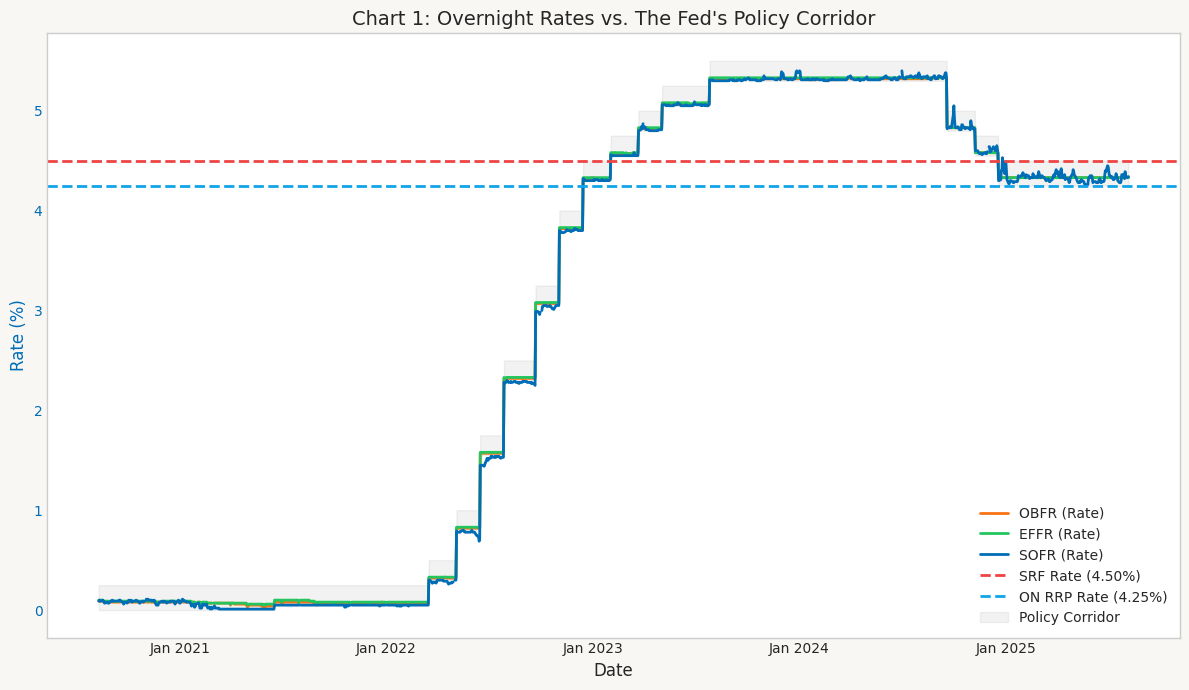

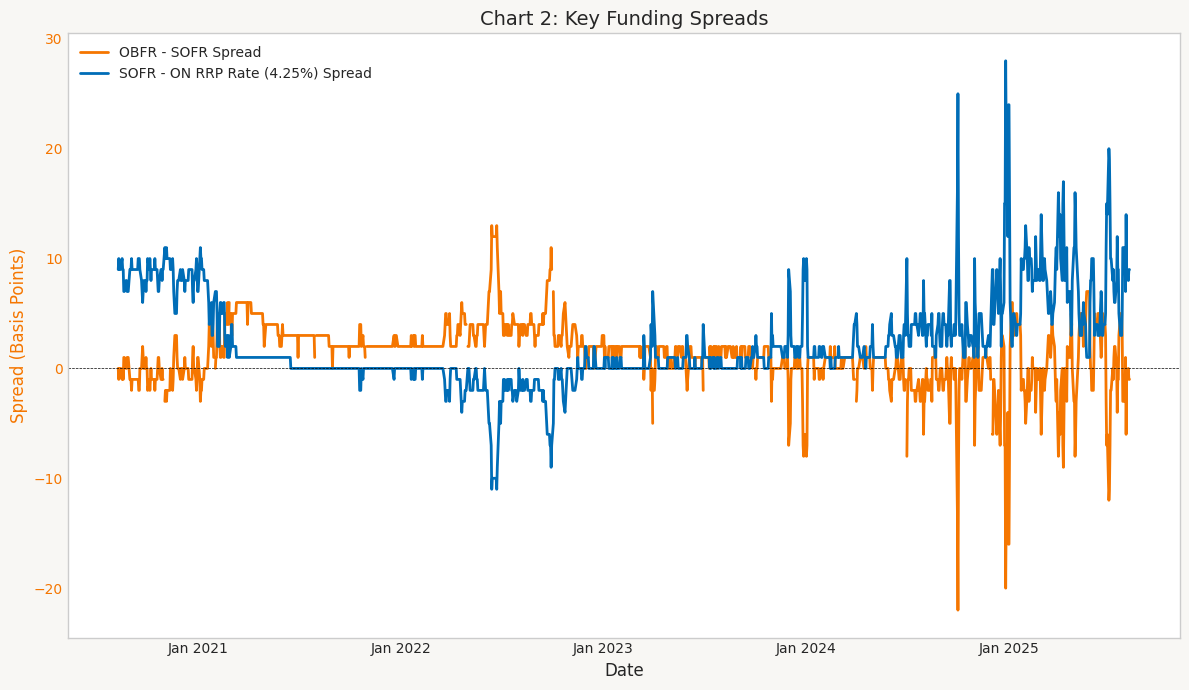

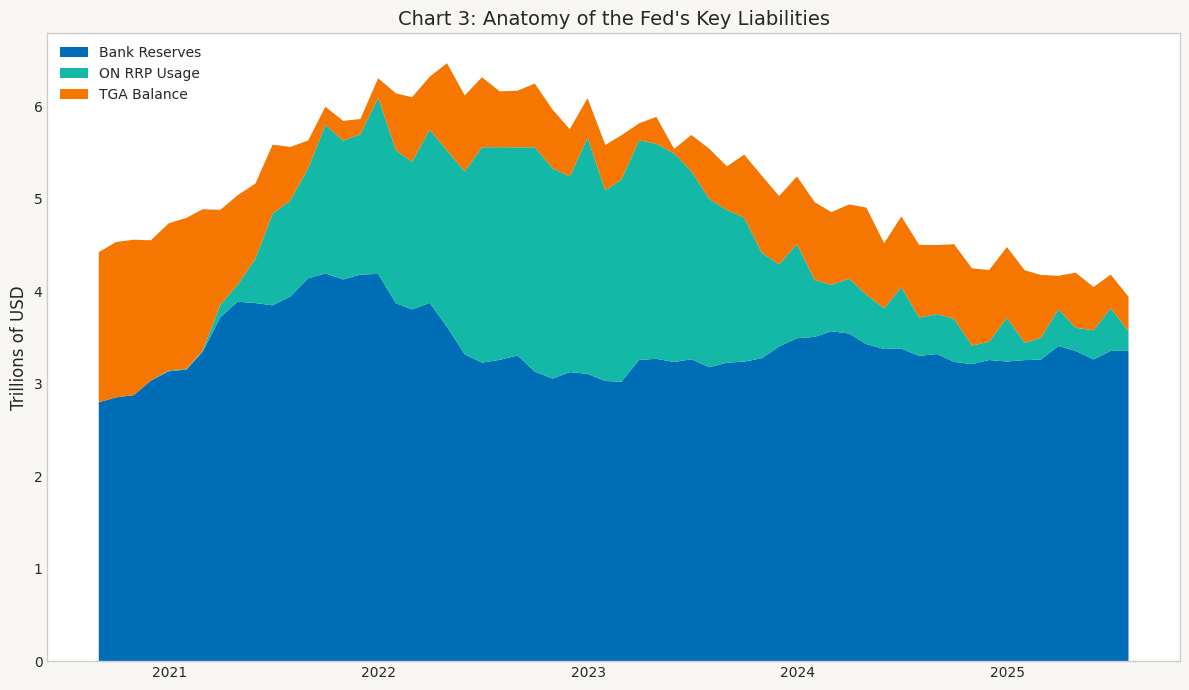

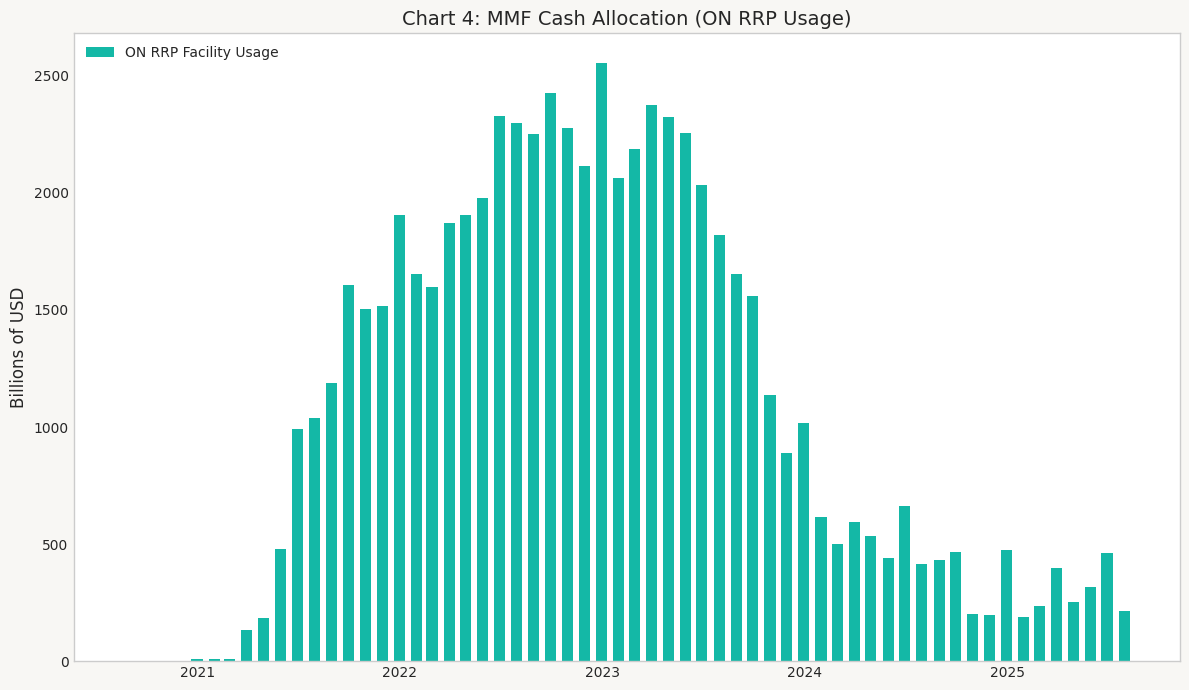

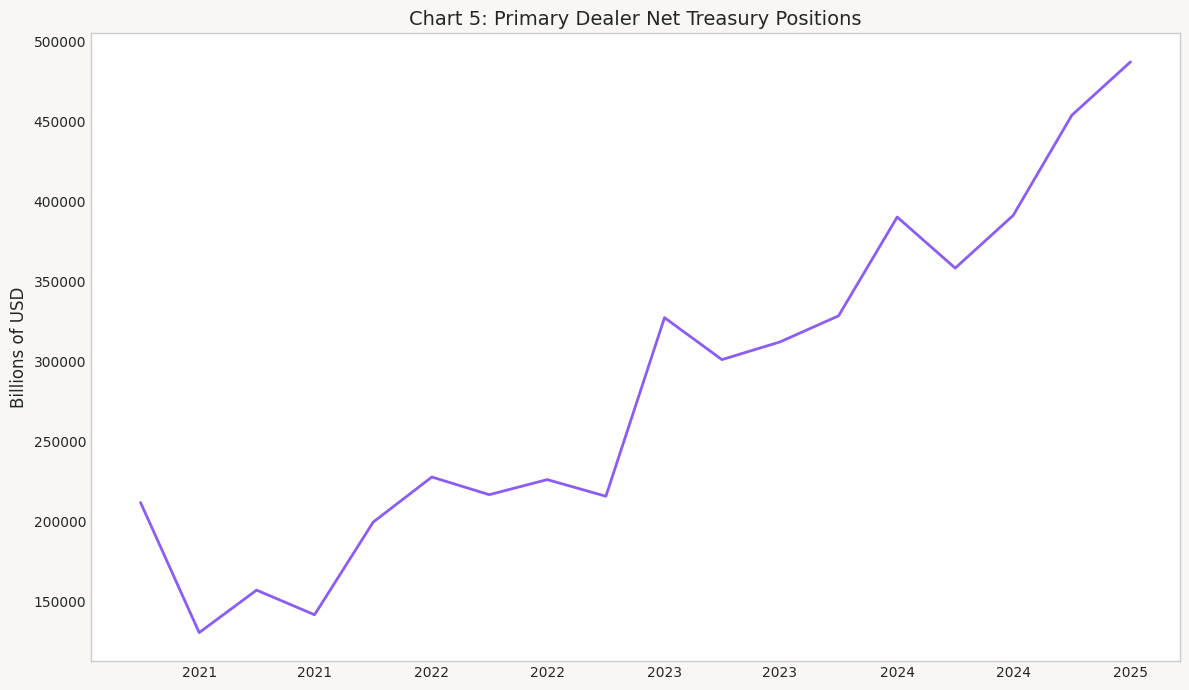

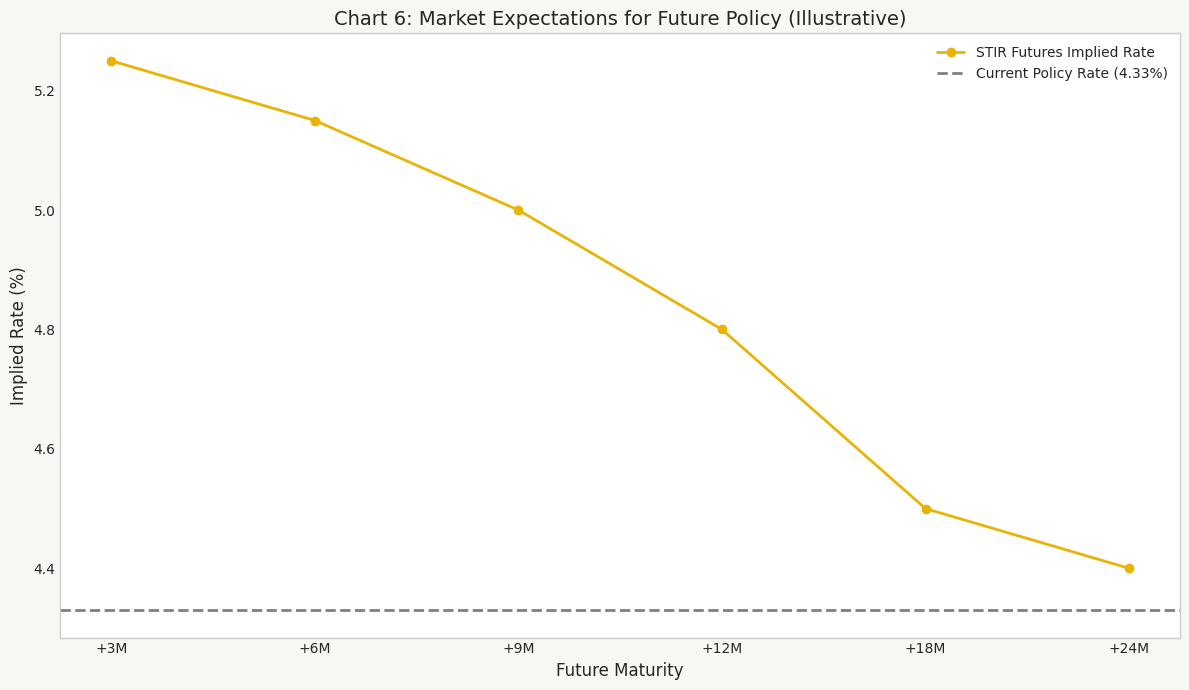

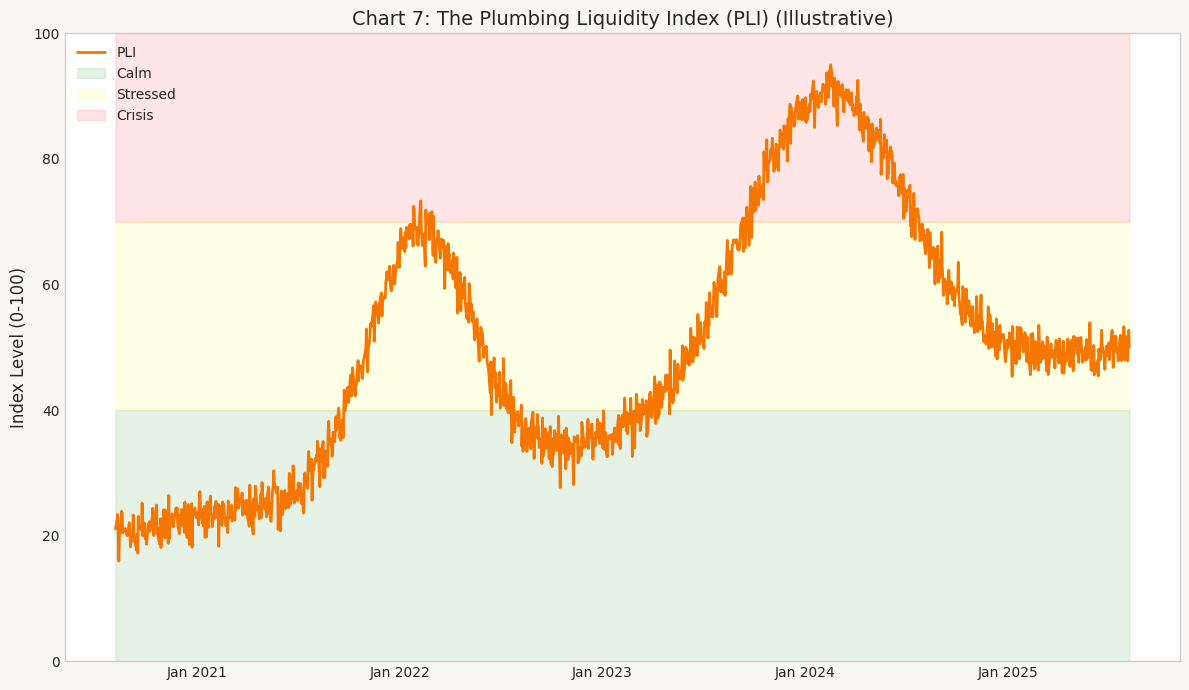

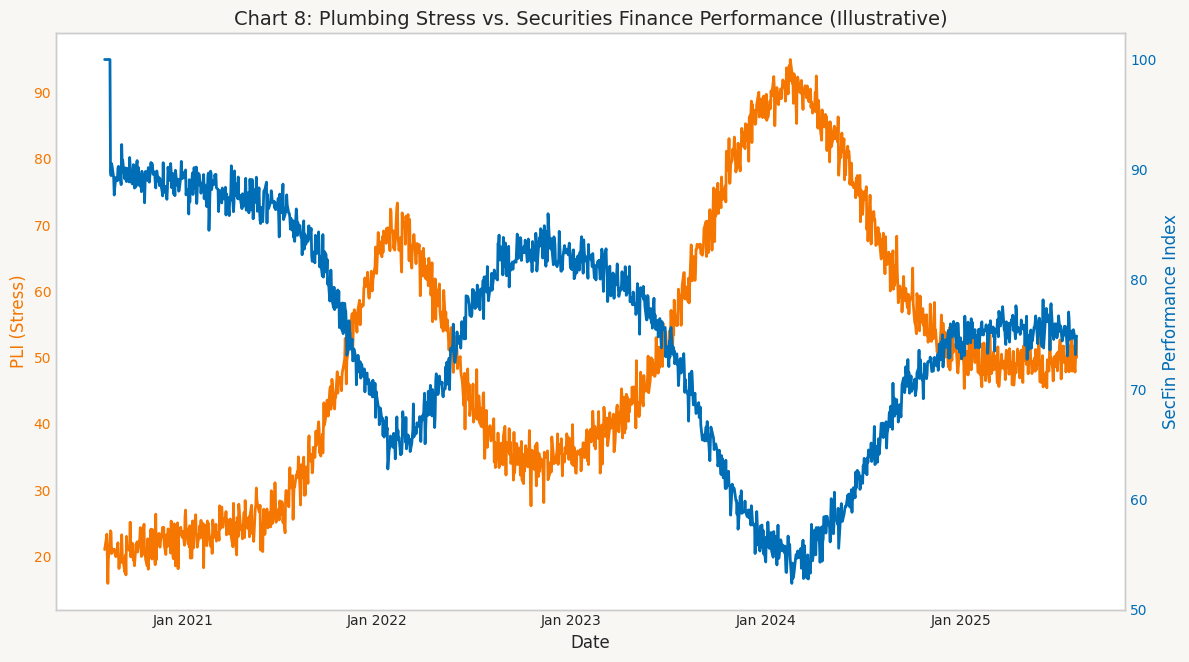

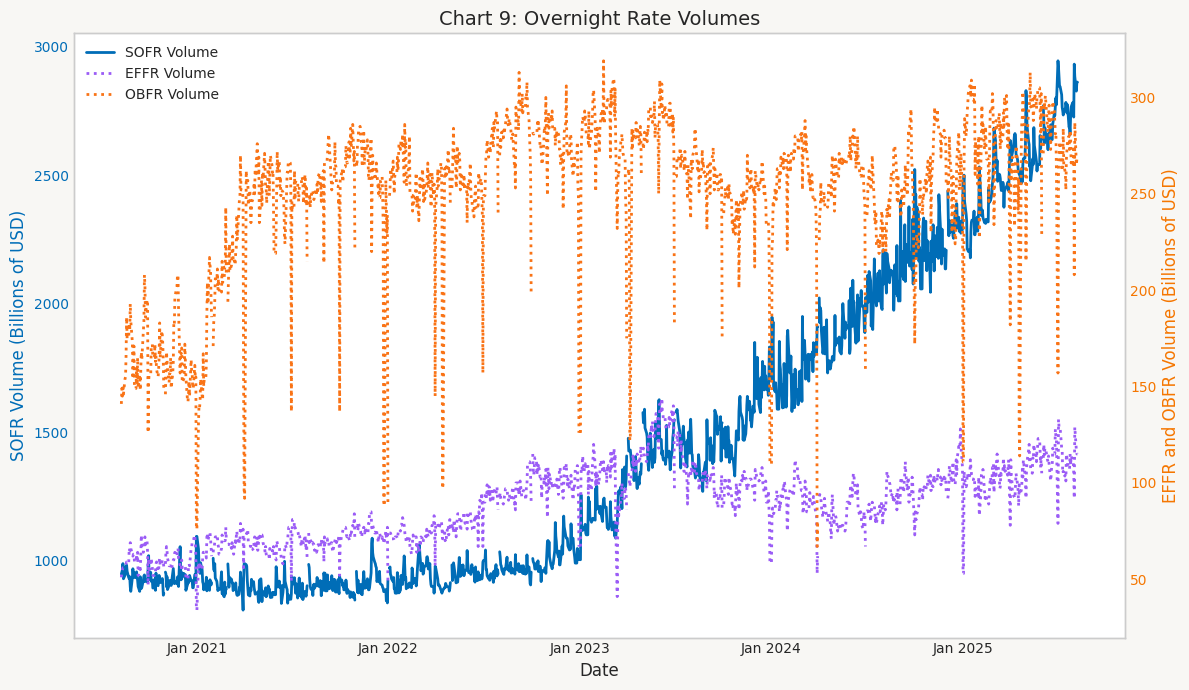

Charts generated and displayed.
Note: Combining charts into a single slide deck programmatically requires additional libraries and code not included in this basic plotting script.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from fredapi import Fred
from alpha_vantage.timeseries import TimeSeries
import os
import time
import zipfile

# Hardcode the API keys
FRED_API_KEY = '7f8e44038ee69c4f78cf71873e85db16'
ALPHA_VANTAGE_API_KEY = 'IOTZFZG01XK55BHI'
EXCEL_FILE_PATH_LIQUIDITY = "/content/rrp_tga_reserves.xlsx"
EXCEL_FILE_PATH_DEALER = "/content/BOGZ1FL663061105Q.xlsx"
BACKUP_ZIP_FILE = "/content/FRED_PLUMBING.zip"

# Initialize the Fred object with the API key
try:
    fred = Fred(api_key=FRED_API_KEY)
    print("FRED API initialized successfully.")
except Exception as e:
    print(f"Error initializing FRED API with hardcoded key: {e}")
    fred = None # Set fred to None if API key is not available

# Initialize Alpha Vantage API
try:
    if ALPHA_VANTAGE_API_KEY:
        # Corrected the typo in the variable name
        ts = TimeSeries(key=ALPHA_VANTAGE_API_KEY, output_format='pandas')
        print("Alpha Vantage API initialized successfully.")
    else:
        print("Warning: ALPHA_VANTAGE_API_KEY is not set. Alpha Vantage data will not be fetched.")
        ts = None
except Exception as e:
    print(f"Error initializing Alpha Vantage API with hardcoded key: {e}")
    ts = None


# --- Global Style Configuration ---
# Use a professional and clean style for all charts
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'DejaVu Sans'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 16
plt.rcParams['figure.facecolor'] = '#f8f7f4'
plt.rcParams['axes.facecolor'] = '#ffffff'
plt.rcParams['axes.grid'] = False # Remove grid lines

# Define custom colors
CUSTOM_BLUE = '#006db7'
CUSTOM_ORANGE = '#f57600'


# Corrected FRED Series IDs based on previous attempts and common usage
# Using new IDs provided by the user for Bank Reserves and Dealer Positions
fred_series_ids = {
    'OBFR': 'OBFR',
    'EFFR': 'DFF', # Corrected FRED ID for EFFR
    'SOFR': 'SOFR',
    'ON_RRP_Usage': 'RRPONTSYD',
    'Bank_Reserves': 'TOTRESNS',
    'TGA_Balance': 'WTREGEN',
    'Dealer_Net_Treasury_Positions': 'BOGZ1FL663061105Q',
    'EFFR_Volume': 'EFFRVOL',
    'SOFR_Volume': 'SOFRVOL',
    'OBFR_VOLUME': 'OBFRVOL',
    'SRF_Rate':'DFEDTARU',
    'ON_RRP_Rate':'RRPONTSYAWARD',
}

def fetch_fred_series(series_id, series_name, start_date=None, end_date=None):
    """Fetches a single FRED series and returns a pandas Series."""
    if fred is None:
        print(f"Skipping FRED series {series_name} ({series_id}): FRED API not initialized.")
        return pd.Series(dtype=float)
    try:
        print(f"Attempting to fetch FRED series: {series_name} ({series_id})...")
        data = fred.get_series(series_id, observation_start=start_date, observation_end=end_date)
        if data is None or data.empty:
            print(f"Warning: No data returned or empty for FRED series ID: {series_id} ({series_name}) from API. Will attempt backup.")
            return pd.Series(dtype=float)
        print(f"Successfully fetched data for {series_name} ({series_id}) from API. Data points: {len(data)}")
        return data
    except Exception as e:
        print(f"Error fetching FRED series {series_id} ({series_name}) from API: {e}. Will attempt backup.")
        return pd.Series(dtype=float)

def load_from_zip_backup(series_id, series_name, zip_file_path, start_date=None, end_date=None):
    """Loads data for a specific FRED series from a CSV within a zip backup."""
    csv_filename = f"{series_id}.csv"
    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zf:
            if csv_filename in zf.namelist():
                print(f"Attempting to load data for {series_name} ({series_id}) from backup zip...")
                with zf.open(csv_filename) as f:
                    # Load data, assuming the CSV has a 'DATE' and 'VALUE' column
                    backup_df = pd.read_csv(f)
                    if 'DATE' in backup_df.columns and 'VALUE' in backup_df.columns:
                        backup_df['DATE'] = pd.to_datetime(backup_df['DATE'])
                        backup_df = backup_df.set_index('DATE')['VALUE']
                        if start_date is not None:
                            backup_df = backup_df.loc[backup_df.index >= start_date]
                        if end_date is not None:
                            backup_df = backup_df.loc[backup_df.index <= end_date]
                        print(f"Successfully loaded data for {series_name} ({series_id}) from backup. Data points: {len(backup_df)}")
                        return backup_df
                    else:
                        print(f"Error: CSV {csv_filename} in backup zip does not contain 'DATE' and 'VALUE' columns.")
                        return pd.Series(dtype=float)
            else:
                print(f"Warning: {csv_filename} not found in backup zip for {series_name} ({series_id}).")
                return pd.Series(dtype=float)
    except FileNotFoundError:
        print(f"Error: Backup zip file not found at {zip_file_path}.")
        return pd.Series(dtype=float)
    except Exception as e:
        print(f"Error loading data for {series_name} ({series_id}) from backup zip: {e}")
        return pd.Series(dtype=float)


def fetch_alpha_vantage_series(symbol, series_name, interval='daily', outputsize='full'):
    """Fetches a single Alpha Vantage series and returns a pandas DataFrame."""
    if ts is None:
        print(f"Skipping Alpha Vantage series {series_name} ({symbol}): Alpha Vantage API not initialized.")
        return pd.DataFrame()
    try:
        print(f"Attempting to fetch Alpha Vantage series: {series_name} ({symbol})...")
        # Using get_daily_adjusted for typical stock data, can change based on need
        data, meta_data = ts.get_daily_adjusted(symbol=symbol, outputsize=outputsize)
        if data is None or data.empty:
            print(f"Warning: No data returned or empty for Alpha Vantage symbol: {symbol} ({series_name}) from API.")
            return pd.DataFrame()
        print(f"Successfully fetched data for {series_name} ({symbol}) from API. Data points: {len(data)}")
        # Alpha Vantage returns data in a specific format, need to clean it up
        data.columns = [col.split('. ')[1] for col in data.columns] # Clean up column names
        data.index = pd.to_datetime(data.index) # Ensure index is datetime
        return data
    except Exception as e:
        print(f"Error fetching Alpha Vantage series {symbol} ({series_name}) from API: {e}")
        return pd.DataFrame()


# --- Data Generation Functions (Modified to use FRED and Excel and Alpha Vantage) ---

def generate_rate_data(years=5):
    """Fetches real data for overnight rates and volumes from FRED for a specified number of years, with backup."""
    end_date = pd.Timestamp.now()
    start_date = end_date - pd.DateOffset(years=years)

    rate_data = {}
    for series_name, series_id in {
        'OBFR': 'OBFR',
        'EFFR': 'DFF',
        'SOFR': 'SOFR',
        'EFFR_Volume': 'EFFRVOL',
        'SOFR_Volume': 'SOFRVOL',
        'OBFR_Volume': 'OBFRVOL',
        'SRF_Rate': 'DFEDTARU',
        'ON_RRP_Rate': 'RRPONTSYAWARD',
    }.items():
        data = fetch_fred_series(series_id, series_name, start_date, end_date)
        if data.empty and os.path.exists(BACKUP_ZIP_FILE):
             data = load_from_zip_backup(series_id, series_name, BACKUP_ZIP_FILE, start_date, end_date)
        if not data.empty:
            rate_data[series_name] = data

    df = pd.DataFrame(rate_data)

    if df.empty or not isinstance(df.index, pd.DatetimeIndex):
        print("Warning: No or invalid rate data fetched from FRED or backup. Returning empty DataFrame.")
        return pd.DataFrame(columns=['OBFR', 'EFFR', 'SOFR', 'EFFR_Volume', 'SOFR_Volume', 'OBFR_Volume', 'ON_RRP_Rate', 'SRF_Rate'])

    df = df.ffill().bfill()

    # Add policy rates (prioritize fetched data if available, otherwise use hardcoded)
    # Check if the fetched columns exist before using combine_first
    if 'ON_RRP_Rate' not in df.columns or df['ON_RRP_Rate'].dropna().empty:
         df['ON_RRP_Rate'] = pd.Series(5.25, index=df.index) # Use hardcoded if fetch failed
    if 'SRF_Rate' not in df.columns or df['SRF_Rate'].dropna().empty:
         df['SRF_Rate'] = pd.Series(5.50, index=df.index) # Use hardcoded if fetch failed


    # Ensure the DataFrame covers the specified years
    # Interpolate daily data to handle missing days before resampling
    df = df.resample('D').interpolate(method='time').asfreq('B').ffill()
    return df.loc[start_date:end_date].dropna(how='all')


def fetch_fred_liquidity_data(years=5):
    """Fetches liquidity data (Bank Reserves, TGA, ON RRP) from FRED."""
    end_date = pd.Timestamp.now().normalize()
    start_date = end_date - pd.DateOffset(years=years)

    liquidity_data = {}
    # Use the FRED IDs already defined
    series_ids_to_fetch = {
        'ON_RRP_Usage': 'RRPONTSYD',
        'Bank_Reserves': 'TOTRESNS',
        'TGA_Balance': 'WTREGEN',
    }

    for series_name, series_id in series_ids_to_fetch.items():
        data = fetch_fred_series(series_id, series_name, start_date, end_date)
        if data.empty and os.path.exists(BACKUP_ZIP_FILE):
             data = load_from_zip_backup(series_id, series_name, BACKUP_ZIP_FILE, start_date, end_date)
        if not data.empty:
            liquidity_data[series_name] = data

    df = pd.DataFrame(liquidity_data)

    if df.empty or not isinstance(df.index, pd.DatetimeIndex):
        print("Warning: No or invalid liquidity data fetched from FRED or backup. Returning empty DataFrame.")
        return pd.DataFrame(columns=['ON_RRP_Usage', 'Bank_Reserves', 'TGA_Balance'])

    # Convert units to Trillions (based on FRED descriptions - typically Billions)
    for col in ['ON_RRP_Usage', 'Bank_Reserves', 'TGA_Balance']:
        if col in df.columns and not df[col].dropna().empty:
            df[col] = df[col] / 1000.0 # Convert Billions to Trillions

    # Handle missing values (forward fill, then back fill)
    df = df.ffill().bfill()

    # Resample to monthly and take the last value of the month, then filter to last 'years'
    # FRED data for these series is typically weekly or daily, resampling to monthly for Chart 3/4
    df = df.resample('ME').last().dropna(how='all')
    return df.loc[start_date:end_date].dropna(how='all')


def fetch_fred_dealer_position_data(years=5):
    """Fetches dealer position data from FRED."""
    end_date = pd.Timestamp.now().normalize()
    start_date = end_date - pd.DateOffset(years=years)

    dealer_data = {}
    # Use the FRED ID already defined
    series_id_to_fetch = 'BOGZ1FL663061105Q'
    series_name = 'Net_Treasury_Positions'

    data = fetch_fred_series(series_id_to_fetch, series_name, start_date, end_date)
    if data.empty and os.path.exists(BACKUP_ZIP_FILE):
         data = load_from_zip_backup(series_id_to_fetch, series_name, BACKUP_ZIP_FILE, start_date, end_date)

    if not data.empty:
        dealer_data[series_name] = data

    df = pd.DataFrame(dealer_data)

    if df.empty or not isinstance(df.index, pd.DatetimeIndex):
        print("Warning: No or invalid dealer position data fetched from FRED or backup. Returning empty DataFrame.")
        return pd.DataFrame(columns=['Net_Treasury_Positions'])

    # Data from this FRED series is likely in Billions, no unit conversion needed for the plot

    # Handle missing values (forward fill, then back fill)
    df = df.ffill().bfill()

    # Resample to the appropriate frequency (likely quarterly based on FRED series) and filter to last 'years'
    # Assuming quarterly data frequency based on the original FRED series ID format
    df = df.resample('QS-JAN').last().dropna(how='all') # Resample to Quarterly Start (Jan) and take last value
    return df.loc[start_date:end_date].dropna(how='all')


def generate_synthesis_data(years=5):
    """Generates illustrative data for the synthesis chart (no FRED series) for a specified number of years."""
    end_date = pd.Timestamp.now().normalize()
    start_date = end_date - pd.DateOffset(years=years)
    dates = pd.to_datetime(pd.date_range(start=start_date, end=end_date, freq='B'))

    # Create a PLI that shows some stress events
    base_pli = 20 + np.linspace(0, 30, len(dates))
    stress_event1 = np.exp(-((np.arange(len(dates)) - len(dates)*0.3)**2) / (2 * (len(dates)*0.05)**2)) * 40
    stress_event2 = np.exp(-((np.arange(len(dates)) - len(dates)*0.7)**2) / (2 * (len(dates)*0.08)**2)) * 50
    pli = base_pli + stress_event1 + stress_event2 + np.random.normal(0, 2, size=len(dates))

    df = pd.DataFrame({'PLI': pli}, index=dates)

    # Create a SecFin index that reacts negatively to PLI with a lag
    df['SecFin_Performance'] = 100 - (df['PLI'].rolling(window=5).mean().shift(3) * 0.5) + np.random.normal(0, 1, size=len(dates))
    df['SecFin_Performance'] = df['SecFin_Performance'].fillna(100)

    return df

def generate_alpha_vantage_data(years=5):
    """Fetches relevant data from Alpha Vantage for a specified number of years."""
    # Define relevant Alpha Vantage symbols
    # Example: SPY (SPDR S&P 500 ETF Trust) as a proxy for market sentiment
    # You can add more symbols here based on what's helpful for your analysis
    alpha_vantage_symbols = {
        'SPY': 'SPDR S&P 500 ETF Trust',
        # Add more symbols here, e.g., for volatility (VIX if available via API or a proxy)
    }

    all_alpha_vantage_data = {}
    for symbol, name in alpha_vantage_symbols.items():
        # Introduce a small delay between API calls to avoid hitting rate limits
        time.sleep(1) # 1 second delay
        data = fetch_alpha_vantage_series(symbol, name, outputsize='full')
        if not data.empty:
            all_alpha_vantage_data[symbol] = data

    # Combine all fetched Alpha Vantage data into a single DataFrame
    # Check if all_alpha_vantage_data is empty before concatenating
    if not all_alpha_vantage_data:
        print("No Alpha Vantage data fetched or available.")
        return pd.DataFrame()

    combined_alpha_vantage_df = pd.concat(all_alpha_vantage_data.values(), axis=1, keys=all_alpha_vantage_data.keys())

    if combined_alpha_vantage_df.empty:
        print("Combined Alpha Vantage data is empty.")
        return pd.DataFrame()

    # Filter data to the last 'years'
    end_date = pd.Timestamp.now().normalize()
    start_date = end_date - pd.DateOffset(years=years)
    combined_alpha_vantage_df = combined_alpha_vantage_df.loc[start_date:end_date]

    # You may want to select specific columns from the Alpha Vantage data, e.g., 'close'
    # For example, to get only the closing price for SPY:
    if 'SPY' in combined_alpha_vantage_df.columns and 'close' in combined_alpha_vantage_df['SPY'].columns:
         combined_alpha_vantage_df['SPY_Close'] = combined_alpha_vantage_df[('SPY', 'close')]
         # Drop the multi-level columns if you've extracted what you need
         combined_alpha_vantage_df = combined_alpha_vantage_df[['SPY_Close']]


    # Handle missing values (forward fill, then back fill)
    combined_alpha_vantage_df = combined_alpha_vantage_df.ffill().bfill()


    return combined_alpha_vantage_df.dropna(how='all')


# --- Charting Functions ---

def plot_chart_1_rate_corridor(data, ax):
    """Plots Chart 1: Overnight Rates vs. The Fed's Corridor using combined data on a given axes."""

    # Primary Y-axis for Rates
    color1 = CUSTOM_BLUE # Using custom blue for rates
    ax.set_xlabel('Date')
    ax.set_ylabel('Rate (%)', color=color1)
    if 'OBFR' in data.columns and not data['OBFR'].dropna().empty:
         ax.plot(data.index, data['OBFR'], label='OBFR (Rate)', color='#f97316', lw=2) # Keeping original colors for now
    if 'EFFR' in data.columns and not data['EFFR'].dropna().empty:
         ax.plot(data.index, data['EFFR'], label='EFFR (Rate)', color='#22c55e', lw=2) # Keeping original colors for now
    if 'SOFR' in data.columns and not data['SOFR'].dropna().empty:
         ax.plot(data.index, data['SOFR'], label='SOFR (Rate)', color=CUSTOM_BLUE, lw=2) # Using custom blue

    # Add policy rates
    # Use data from the DataFrame if available, otherwise use default hardcoded values
    on_rrp_rate = data['ON_RRP_Rate'].dropna().iloc[-1] if 'ON_RRP_Rate' in data.columns and not data['ON_RRP_Rate'].dropna().empty else 5.25
    srf_rate = data['SRF_Rate'].dropna().iloc[-1] if 'SRF_Rate' in data.columns and not data['SRF_Rate'].dropna().empty else 5.50

    ax.axhline(srf_rate, color='#ef4444', ls='--', lw=2, label=f'SRF Rate ({srf_rate:.2f}%)')
    ax.axhline(on_rrp_rate, color='#0ea5e9', ls='--', lw=2, label=f'ON RRP Rate ({on_rrp_rate:.2f}%)')

    # Fill between policy rates
    # Ensure the fill area is aligned with the data index
    fill_data = data[['ON_RRP_Rate', 'SRF_Rate']].dropna(how='all')
    if not fill_data.empty:
        ax.fill_between(fill_data.index, fill_data['ON_RRP_Rate'], fill_data['SRF_Rate'], color='gray', alpha=0.1, label='Policy Corridor')
    elif not data.empty:
        # If no data for policy rates, fill between the hardcoded values across the plot's x-range using the data index
        ax.fill_between(data.index, on_rrp_rate, srf_rate, color='gray', alpha=0.1, label='Policy Corridor')


    ax.tick_params(axis='y', labelcolor=color1)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.grid(False) # Ensure no grid lines

    # No secondary axis for volume on this chart based on user feedback

    # Combine legends from both axes
    lines1, labels1 = ax.get_legend_handles_labels()
    ax.legend(lines1, labels1, loc='best')

    ax.set_title('Chart 1: Overnight Rates vs. The Fed\'s Policy Corridor')


def plot_chart_2_funding_spreads(data, ax):
    """Plots Chart 2: Key Funding Spreads using combined data (Volume removed) on a given axes."""

    # Primary Y-axis for Spreads
    color1 = CUSTOM_ORANGE
    ax.set_xlabel('Date')
    ax.set_ylabel('Spread (Basis Points)', color=color1)

    # Calculate spreads using columns from the combined data
    if 'OBFR' in data.columns and 'SOFR' in data.columns and not data[['OBFR', 'SOFR']].dropna().empty:
        obfr_sofr_spread = (data['OBFR'] - data['SOFR']) * 100
        ax.plot(data.index, obfr_sofr_spread, label='OBFR - SOFR Spread', color=CUSTOM_ORANGE, lw=2)

    # Using ON RRP Rate from the DataFrame for spread calculation
    if 'SOFR' in data.columns and 'ON_RRP_Rate' in data.columns and not data[['SOFR', 'ON_RRP_Rate']].dropna().empty:
         # Ensure both series are aligned by index before calculating the spread
         temp_spread_df = data[['SOFR', 'ON_RRP_Rate']].dropna()
         sofr_onrrp_spread = (temp_spread_df['SOFR'] - temp_spread_df['ON_RRP_Rate']) * 100
         # Use the latest ON RRP Rate for the label
         latest_on_rrp_rate = data['ON_RRP_Rate'].dropna().iloc[-1] if not data['ON_RRP_Rate'].dropna().empty else 5.25
         ax.plot(sofr_onrrp_spread.index, sofr_onrrp_spread, label=f'SOFR - ON RRP Rate ({latest_on_rrp_rate:.2f}%) Spread', color=CUSTOM_BLUE, lw=2)


    ax.axhline(0, color='black', lw=0.5, ls='--')
    ax.tick_params(axis='y', labelcolor=color1)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.grid(False) # Ensure no grid lines

    # Remove secondary Y-axis and volume plots
    # ax2 = ax.twinx()
    # color2 = '#14b8a6' # Using a different color for volume
    # ax2.set_ylabel('Volume (Billions of USD)', color=color2)

    # if 'EFFR_Volume' in data.columns and not data['EFFR_Volume'].dropna().empty:
    #     ax2.plot(data.index, data['EFFR_Volume'], label='EFFR Volume', color='#9b5cf6', ls=':', lw=2) # Using a different color/style for volume
    # if 'SOFR_Volume' in data.columns and not data['SOFR_Volume'].dropna().empty:
    #     ax2.plot(data.index, data['SOFR_Volume'], label='SOFR Volume', color='#3498db', ls=':', lw=2) # Using a different color/style for volume

    # ax2.tick_params(axis='y', labelcolor=color2)
    # ax2.grid(False) # Ensure no grid lines

    # Combine legends from both axes
    lines1, labels1 = ax.get_legend_handles_labels()
    # lines2, labels2 = ax2.get_legend_handles_labels() # Removed
    ax.legend(lines1, labels1, loc='best') # Updated legend call


    ax.set_title('Chart 2: Key Funding Spreads') # Updated title


def plot_chart_3_fed_liabilities(data, ax):
    """Plots Chart 3: Anatomy of the Fed's Key Liabilities using combined data on a given axes."""

    labels = []
    series_to_plot = []
    colors = []

    # Columns are expected to be converted to Trillions before being passed to the plotting function
    if 'Bank_Reserves' in data.columns and not data['Bank_Reserves'].dropna().empty:
        labels.append("Bank Reserves")
        series_to_plot.append(data['Bank_Reserves'])
        colors.append(CUSTOM_BLUE)
    if 'ON_RRP_Usage' in data.columns and not data['ON_RRP_Usage'].dropna().empty:
        labels.append("ON RRP Usage")
        series_to_plot.append(data['ON_RRP_Usage'])
        colors.append('#14b8a6')
    if 'TGA_Balance' in data.columns and not data['TGA_Balance'].dropna().empty:
        labels.append("TGA Balance")
        series_to_plot.append(data['TGA_Balance'])
        colors.append(CUSTOM_ORANGE)

    if series_to_plot:
        # Align indices before stacking - important if there are NaNs or different frequencies
        # Use outer join to ensure all dates are included
        combined_series_df = pd.concat(series_to_plot, axis=1)
        combined_series_df = combined_series_df.dropna(how='all') # Drop rows where all are NaN

        if not combined_series_df.empty:
             ax.stackplot(combined_series_df.index, *[combined_series_df[col] for col in combined_series_df.columns], labels=labels, colors=colors)
             ax.set_title('Chart 3: Anatomy of the Fed\'s Key Liabilities')
             ax.set_ylabel('Trillions of USD')
             ax.legend(loc='upper left')
             ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
             ax.grid(False)
        else:
            ax.text(0.5, 0.5, 'No data available for Chart 3', horizontalalignment='center', verticalalignment='center', fontsize=16, transform=ax.transAxes)
            ax.set_title('Chart 3: Anatomy of the Fed\'s Key Liabilities (No Data)')
            ax.axis('off')

    else:
        ax.text(0.5, 0.5, 'No data available for Chart 3', horizontalalignment='center', verticalalignment='center', fontsize=16, transform=ax.transAxes)
        ax.set_title('Chart 3: Anatomy of the Fed\'s Key Liabilities (No Data)')
        ax.axis('off')


def plot_chart_4_mmf_allocation(data, ax):
    """Plots Chart 4: MMF Cash Allocation (ON RRP Usage) using combined data on a given axes."""

    # Using the ON RRP Usage from the combined data, which is expected to be in Trillions from the FRED fetch,
    # but converting back to Billions for this specific chart's Y-axis label as requested previously.
    if 'ON_RRP_Usage' in data.columns and not data['ON_RRP_Usage'].dropna().empty:
        # Convert Trillions back to Billions for this specific chart's Y-axis label
        on_rrp_billions = data['ON_RRP_Usage'].dropna() * 1000

        ax.bar(on_rrp_billions.index, on_rrp_billions, width=20, color='#14b8a6', label='ON RRP Facility Usage')
        ax.set_title('Chart 4: MMF Cash Allocation (ON RRP Usage)')
        ax.set_ylabel('Billions of USD')
        ax.legend(loc='upper left')
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        ax.grid(False)
    else:
        ax.text(0.5, 0.5, 'No data available for Chart 4', horizontalalignment='center', verticalalignment='center', fontsize=16, transform=ax.transAxes)
        ax.set_title('Chart 4: MMF Cash Allocation (ON RRP Usage) (No Data)')
        ax.axis('off')


def plot_chart_5_dealer_inventory(data, ax):
    """Plots Chart 5: Primary Dealer Net Treasury Positions using combined data (Real from FRED) on a given axes."""

    # This chart now uses real data from the combined DataFrame fetched via FRED series BOGZ1FL663061105Q
    if 'Net_Treasury_Positions' in data.columns and not data['Net_Treasury_Positions'].dropna().empty:
        dealer_positions = data['Net_Treasury_Positions'].dropna()
        ax.plot(dealer_positions.index, dealer_positions, color='#8b5cf6', lw=2)
        ax.set_title('Chart 5: Primary Dealer Net Treasury Positions')
        # Data from FRED series BOGZ1FL663061105Q is in Billions
        ax.set_ylabel('Billions of USD')
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        ax.grid(False)
    else:
        ax.text(0.5, 0.5, 'No data available for Chart 5', horizontalalignment='center', verticalalignment='center', fontsize=16, transform=ax.transAxes)
        ax.set_title('Chart 5: Primary Dealer Net Treasury Positions (No Data)')
        ax.axis('off')


def plot_chart_6_stir_futures(data, ax):
    """Plots Chart 6: Market Expectations for Future Policy (Illustrative) on a given axes."""

    # This chart will remain illustrative for now unless a suitable API is found
    maturities = ['+3M', '+6M', '+9M', '+12M', '+18M', '+24M']
    implied_rates = [5.25, 5.15, 5.0, 4.8, 4.5, 4.4]
    # Use the latest EFFR or SOFR as a proxy for current rate if available, otherwise use a hardcoded value
    current_rate = data['EFFR'].dropna().iloc[-1] if 'EFFR' in data.columns and not data['EFFR'].dropna().empty else (data['SOFR'].dropna().iloc[-1] if 'SOFR' in data.columns and not data['SOFR'].dropna().empty else 5.33)


    ax.plot(maturities, implied_rates, marker='o', ls='-', color='#eab308', lw=2, label='STIR Futures Implied Rate')
    ax.axhline(current_rate, color='gray', ls='--', lw=2, label=f'Current Policy Rate ({current_rate:.2f}%)')

    ax.set_title('Chart 6: Market Expectations for Future Policy (Illustrative)')
    ax.set_ylabel('Implied Rate (%)')
    ax.set_xlabel('Future Maturity')
    ax.legend()
    ax.grid(False)


def plot_chart_7_pli(data, ax):
    """Plots Chart 7: The Plumbing Liquidity Index (PLI) (Illustrative) using combined data on a given axes."""

    # This chart uses illustrative data from the combined DataFrame
    if 'PLI' in data.columns and not data['PLI'].dropna().empty:
        pli_data = data['PLI'].dropna()
        ax.plot(pli_data.index, pli_data, color=CUSTOM_ORANGE, lw=2, label='PLI')

        # Use the index of the actual data for fill_between
        ax.fill_between(pli_data.index, 0, 40, color='green', alpha=0.1, label='Calm')
        ax.fill_between(pli_data.index, 40, 70, color='yellow', alpha=0.1, label='Stressed')
        ax.fill_between(pli_data.index, 70, 100, color='red', alpha=0.1, label='Crisis')

        ax.set_title('Chart 7: The Plumbing Liquidity Index (PLI) (Illustrative)')
        ax.set_ylabel('Index Level (0-100)')
        ax.set_ylim(0, 100)
        ax.legend(loc='upper left')
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
        ax.grid(False)
    else:
        ax.text(0.5, 0.5, 'No data available for Chart 7', horizontalalignment='center', verticalalignment='center', fontsize=16, transform=ax.transAxes)
        ax.set_title('Chart 7: The Plumbing Liquidity Index (PLI) (Illustrative) (No Data)')
        ax.axis('off')


def plot_chart_8_synthesis(data, ax1):
    """Plots Chart 8: Plumbing Stress vs. Securities Finance Performance (Illustrative) using combined data on a given axes."""

    # This chart uses illustrative data from the combined DataFrame
    if 'PLI' in data.columns and 'SecFin_Performance' in data.columns and not data[['PLI', 'SecFin_Performance']].dropna().empty:

        # Align indices before plotting
        temp_df = data[['PLI', 'SecFin_Performance']].dropna()

        if not temp_df.empty:
            color1 = CUSTOM_ORANGE
            ax1.set_xlabel('Date')
            ax1.set_ylabel('PLI (Stress)', color=color1)
            ax1.plot(temp_df.index, temp_df['PLI'], color=color1, lw=2, label='PLI')
            ax1.tick_params(axis='y', labelcolor=color1)
            ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

            ax2 = ax1.twinx()
            color2 = CUSTOM_BLUE
            ax2.set_ylabel('SecFin Performance Index', color=color2)
            ax2.plot(temp_df.index, temp_df['SecFin_Performance'], color=color2, lw=2, label='SecFin Performance')
            ax2.tick_params(axis='y', labelcolor=color2)

            ax1.set_title('Chart 8: Plumbing Stress vs. Securities Finance Performance (Illustrative)')
            ax1.grid(False)
            ax2.grid(False)
        else:
            ax1.text(0.5, 0.5, 'No data available for Chart 8', horizontalalignment='center', verticalalignment='center', fontsize=16, transform=ax1.transAxes)
            ax1.set_title('Chart 8: Plumbing Stress vs. Securities Finance Performance (Illustrative) (No Data)')
            ax1.axis('off')
            # If twinx created a second axis, hide it too - check if ax2 exists and is different from ax1
            if 'ax2' in locals() and ax1 != ax2:
                 ax2.axis('off')

    else:
        ax1.text(0.5, 0.5, 'No data available for Chart 8', horizontalalignment='center', verticalalignment='center', fontsize=16, transform=ax1.transAxes)
        ax1.set_title('Chart 8: Plumbing Stress vs. Securities Finance Performance (Illustrative) (No Data)')
        ax1.axis('off')
        # If twinx created a second axis, hide it too - check if ax2 exists and is different from ax1
        if 'ax2' in locals() and ax1 != ax2:
             ax2.axis('off')


def plot_chart_9_volumes(data, ax1):
    """Plots Chart 9: Overnight Rate Volumes using combined data on a given axes."""

    # Primary Y-axis for SOFR Volume
    color1 = CUSTOM_BLUE
    ax1.set_xlabel('Date')
    ax1.set_ylabel('SOFR Volume (Billions of USD)', color=color1)
    if 'SOFR_Volume' in data.columns and not data['SOFR_Volume'].dropna().empty:
        ax1.plot(data.index, data['SOFR_Volume'], label='SOFR Volume', color=color1, lw=2)
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax1.grid(False) # Ensure no grid lines


    # Secondary Y-axis for EFFR and OBFR Volumes
    ax2 = ax1.twinx()
    color2 = CUSTOM_ORANGE
    ax2.set_ylabel('EFFR and OBFR Volume (Billions of USD)', color=color2)

    if 'EFFR_Volume' in data.columns and not data['EFFR_Volume'].dropna().empty:
        ax2.plot(data.index, data['EFFR_Volume'], label='EFFR Volume', color='#9b5cf6', ls=':', lw=2) # Using a different color/style for volume
    if 'OBFR_Volume' in data.columns and not data['OBFR_Volume'].dropna().empty:
        ax2.plot(data.index, data['OBFR_Volume'], label='OBFR Volume', color='#f97316', ls=':', lw=2) # Example color for OBFR Volume


    ax2.tick_params(axis='y', labelcolor=color2)
    ax2.grid(False) # Ensure no grid lines

    # Combine legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')


    ax1.set_title('Chart 9: Overnight Rate Volumes')


if __name__ == '__main__':
    # Generate necessary data
    rate_data = generate_rate_data(years=5)
    # Fetch liquidity data from FRED
    liquidity_data = fetch_fred_liquidity_data(years=5)
    # Fetch dealer data from FRED
    dealer_data = fetch_fred_dealer_position_data(years=5)
    synthesis_data = generate_synthesis_data(years=5) # Illustrative
    alpha_vantage_data = generate_alpha_vantage_data(years=5) # Fetch Alpha Vantage data


    # Print head and info of dataframes for inspection
    print("\n--- Inspection of rate_data DataFrame (for Charts 1, 2, 9) ---")
    display(rate_data.head())
    rate_data.info()

    print("\n--- Inspection of liquidity_data DataFrame (for Charts 3 and 4) ---")
    display(liquidity_data.head())
    liquidity_data.info()

    print("\n--- Inspection of dealer_data DataFrame (for Chart 5) ---")
    display(dealer_data.head())
    dealer_data.info()

    print("\n--- Inspection of alpha_vantage_data DataFrame ---")
    display(alpha_vantage_data.head())
    alpha_vantage_data.info()


    # Consolidate all data into a single DataFrame
    combined_df = rate_data.join(liquidity_data, how='outer').join(dealer_data, how='outer').join(synthesis_data, how='outer').join(alpha_vantage_data, how='outer')

    # Print info of combined_df to see all columns
    print("\n--- Inspection of combined_df DataFrame ---")
    combined_df.info()

    # Create figures and axes for each chart
    # This allows us to pass axes objects to the plotting functions
    fig1, ax1 = plt.subplots(figsize=(12, 7))
    fig2, ax2 = plt.subplots(figsize=(12, 7))
    fig3, ax3 = plt.subplots(figsize=(12, 7))
    fig4, ax4 = plt.subplots(figsize=(12, 7))
    fig5, ax5 = plt.subplots(figsize=(12, 7))
    fig6, ax6 = plt.subplots(figsize=(12, 7))
    fig7, ax7 = plt.subplots(figsize=(12, 7))
    fig8, ax8 = plt.subplots(figsize=(12, 7))
    fig9, ax9 = plt.subplots(figsize=(12, 7))


    # Plot all charts using the axes objects
    plot_chart_1_rate_corridor(combined_df, ax1)
    plot_chart_2_funding_spreads(combined_df, ax2)
    plot_chart_3_fed_liabilities(combined_df, ax3)
    plot_chart_4_mmf_allocation(combined_df, ax4)
    plot_chart_5_dealer_inventory(combined_df, ax5)
    plot_chart_6_stir_futures(combined_df, ax6)
    plot_chart_7_pli(combined_df, ax7)
    plot_chart_8_synthesis(combined_df, ax8)
    plot_chart_9_volumes(combined_df, ax9)

    # Apply tight layout to all figures
    fig1.tight_layout()
    fig2.tight_layout()
    fig3.tight_layout()
    fig4.tight_layout()
    fig5.tight_layout()
    fig6.tight_layout()
    fig7.tight_layout()
    fig8.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust for suptitle
    fig9.tight_layout()


    # Instead of saving as HTML files, we can display them directly in the notebook
    # or explore options for combining them into a single presentation format.
    # For now, we'll keep displaying them individually.

    plt.show() # Display all plots

    # You can manually save each figure as a high-resolution image (e.g., PNG)
    # and then combine them into a presentation manually or using another tool.
    # Example:
    # fig1.savefig("chart1.png", dpi=300)
    # fig2.savefig("chart2.png", dpi=300)
    # ... and so on for all figures.

    # To create a slide deck programmatically, you would typically use libraries
    # like python-pptx. This is a more complex task and would require significant
    # code to arrange the plots on slides.

    print("Charts generated and displayed.")
    print("Note: Combining charts into a single slide deck programmatically requires additional libraries and code not included in this basic plotting script.")

FRED API initialized successfully.
Alpha Vantage API initialized successfully.
Attempting to fetch FRED series: OBFR (OBFR)...
Successfully fetched data for OBFR (OBFR) from API. Data points: 1303
Attempting to fetch FRED series: EFFR (DFF)...
Successfully fetched data for EFFR (DFF) from API. Data points: 1825
Attempting to fetch FRED series: SOFR (SOFR)...
Successfully fetched data for SOFR (SOFR) from API. Data points: 1303
Attempting to fetch FRED series: EFFR_Volume (EFFRVOL)...
Successfully fetched data for EFFR_Volume (EFFRVOL) from API. Data points: 1303
Attempting to fetch FRED series: SOFR_Volume (SOFRVOL)...
Successfully fetched data for SOFR_Volume (SOFRVOL) from API. Data points: 1303
Attempting to fetch FRED series: OBFR_Volume (OBFRVOL)...
Successfully fetched data for OBFR_Volume (OBFRVOL) from API. Data points: 1303
Attempting to fetch FRED series: SRF_Rate (DFEDTARU)...
Successfully fetched data for SRF_Rate (DFEDTARU) from API. Data points: 1826
Attempting to fetch F

,OBFR,EFFR,SOFR,EFFR_Volume,SOFR_Volume,OBFR_Volume,SRF_Rate,ON_RRP_Rate
2020-08-10,0.09,0.1,0.09,51.0,948.0,141.0,0.25,0.0
2020-08-11,0.09,0.1,0.10,54.0,956.0,149.0,0.25,0.0
2020-08-12,0.09,0.1,0.09,55.0,964.0,145.0,0.25,0.0
2020-08-13,0.09,0.1,0.09,56.0,989.0,151.0,0.25,0.0
2020-08-14,0.09,0.1,0.09,56.0,930.0,146.0,0.25,0.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1303 entries, 2020-08-10 to 2025-08-06
Freq: B
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OBFR         1303 non-null   float64
 1   EFFR         1303 non-null   float64
 2   SOFR         1303 non-null   float64
 3   EFFR_Volume  1303 non-null   float64
 4   SOFR_Volume  1303 non-null   float64
 5   OBFR_Volume  1303 non-null   float64
 6   SRF_Rate     1303 non-null   float64
 7   ON_RRP_Rate  1303 non-null   float64
dtypes: float64(8)
memory usage: 91.6 KB

--- Inspection of liquidity_data DataFrame (for Charts 3 and 4) ---


,ON_RRP_Usage,Bank_Reserves,TGA_Balance
2020-08-31,0.000011,2.7997,1.622690
2020-09-30,0.000850,2.8528,1.679152
2020-10-31,0.000001,2.8766,1.680933
2020-11-30,0.000006,3.0347,1.517215
2020-12-31,0.009651,3.1350,1.591055


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2020-08-31 to 2025-07-31
Freq: ME
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ON_RRP_Usage   60 non-null     float64
 1   Bank_Reserves  60 non-null     float64
 2   TGA_Balance    60 non-null     float64
dtypes: float64(3)
memory usage: 1.9 KB

--- Inspection of dealer_data DataFrame (for Chart 5) ---


,Net_Treasury_Positions
2020-10-01,211955.0
2021-01-01,130587.0
2021-04-01,157157.0
2021-07-01,141750.0
2021-10-01,199700.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18 entries, 2020-10-01 to 2025-01-01
Freq: QS-JAN
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Net_Treasury_Positions  18 non-null     float64
dtypes: float64(1)
memory usage: 288.0 bytes

--- Inspection of alpha_vantage_data DataFrame ---


""


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Empty DataFrame

--- Inspection of combined_df DataFrame ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1327 entries, 2020-08-07 to 2025-08-07
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   OBFR                    1303 non-null   float64
 1   EFFR                    1303 non-null   float64
 2   SOFR                    1303 non-null   float64
 3   EFFR_Volume             1303 non-null   float64
 4   SOFR_Volume             1303 non-null   float64
 5   OBFR_Volume             1303 non-null   float64
 6   SRF_Rate                1303 non-null   float64
 7   ON_RRP_Rate             1303 non-null   float64
 8   ON_RRP_Usage            60 non-null     float64
 9   Bank_Reserves           60 non-null     float64
 10  TGA_Balance             60 non-null     float64
 11  Net_Treasury_Positions  18 non-null     float64
 12  PLI    

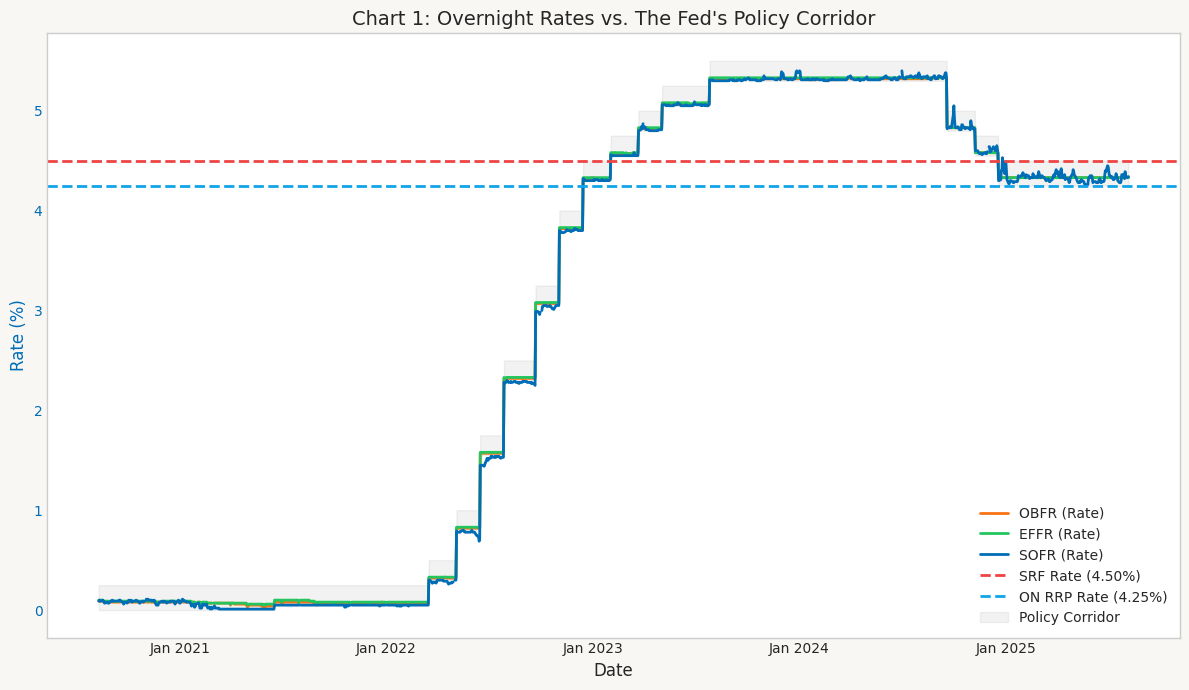

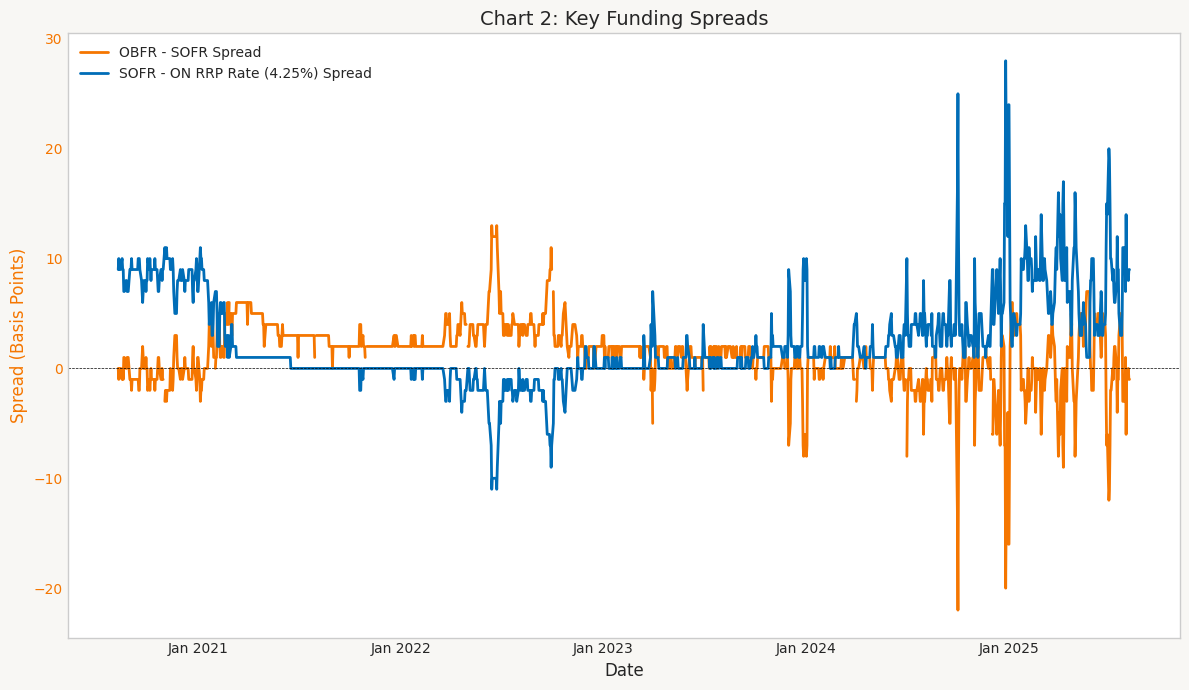

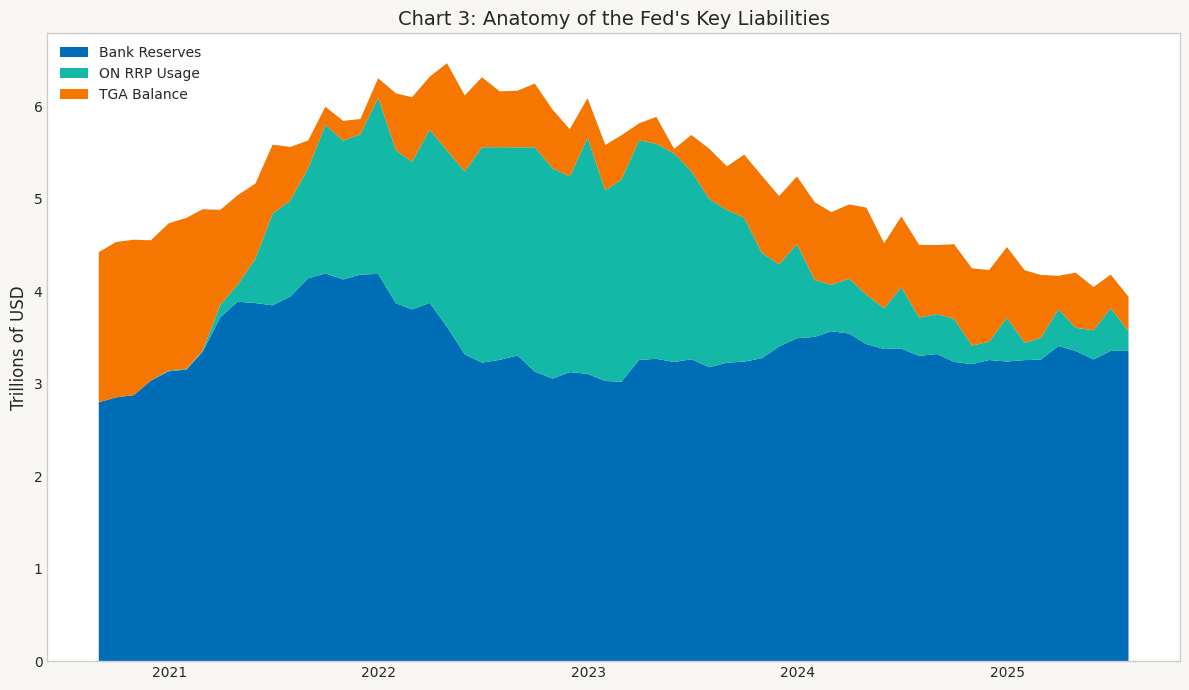

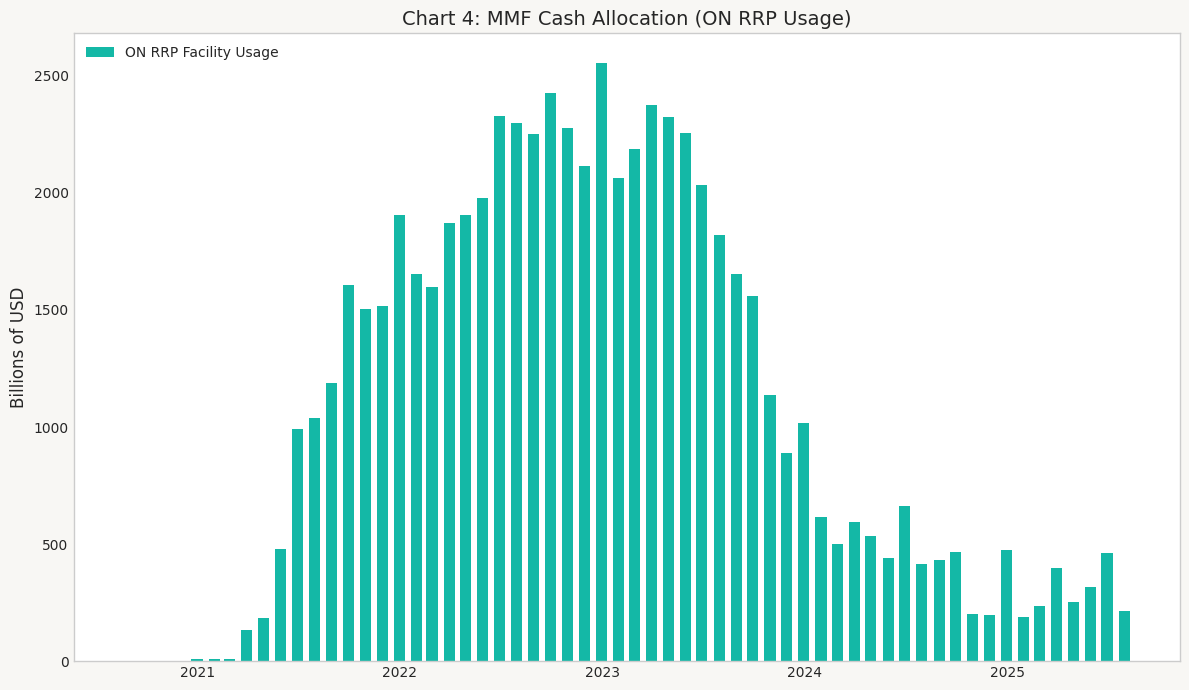

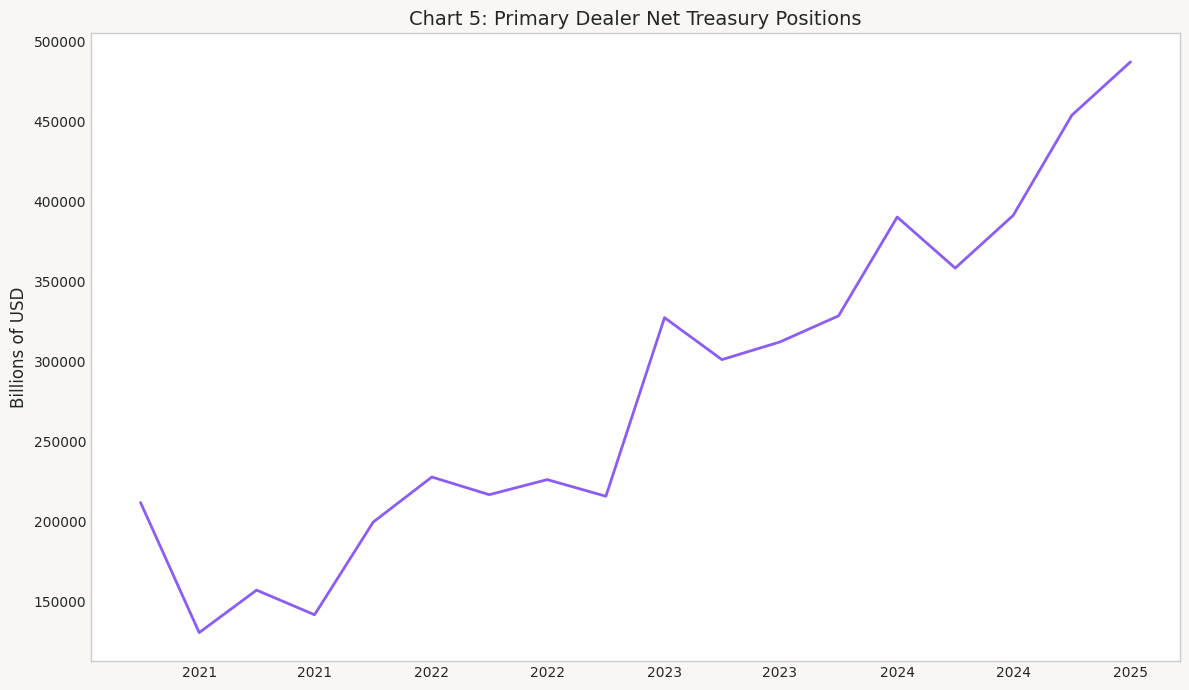

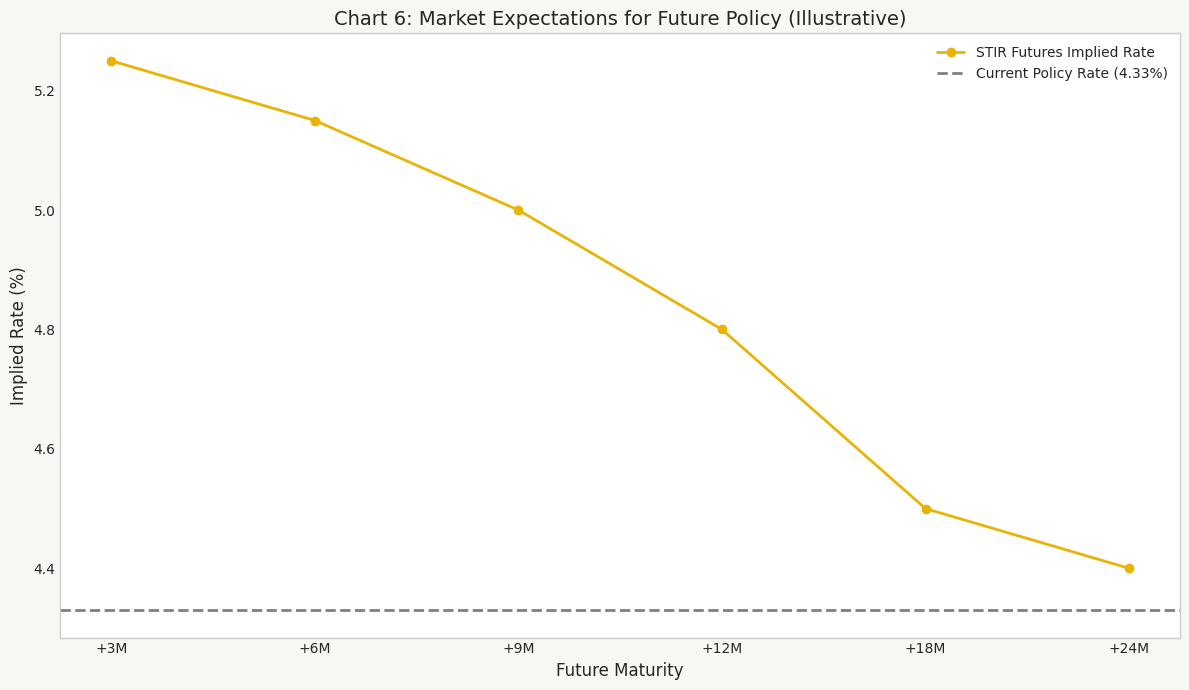

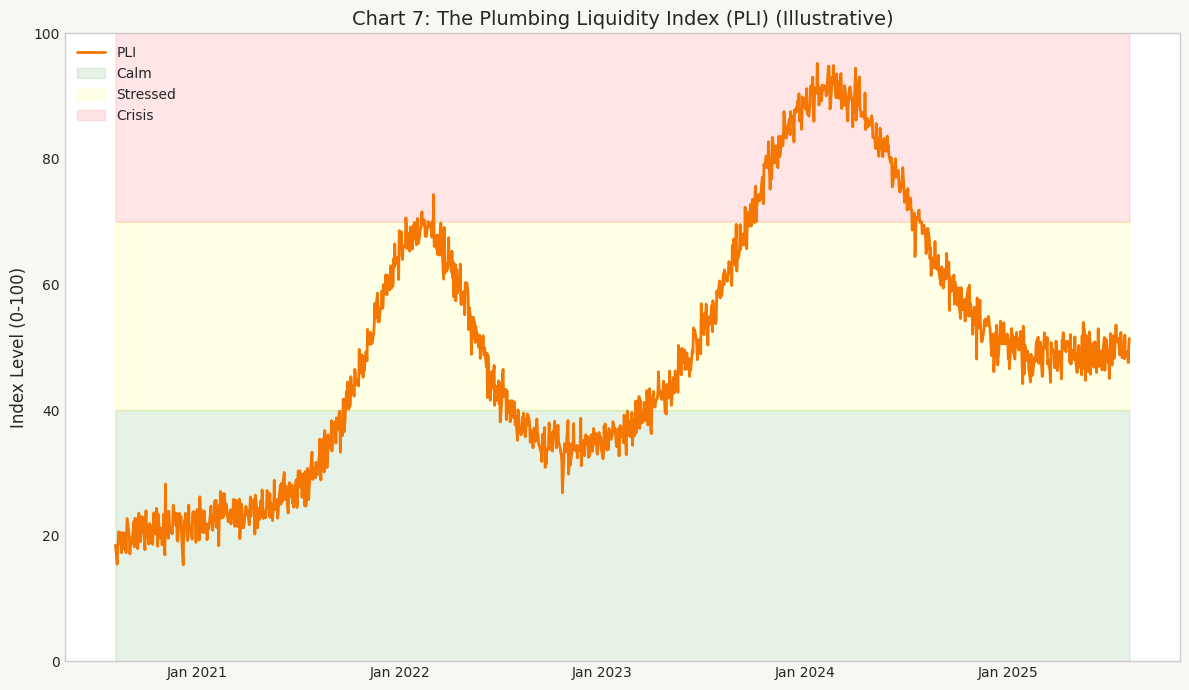

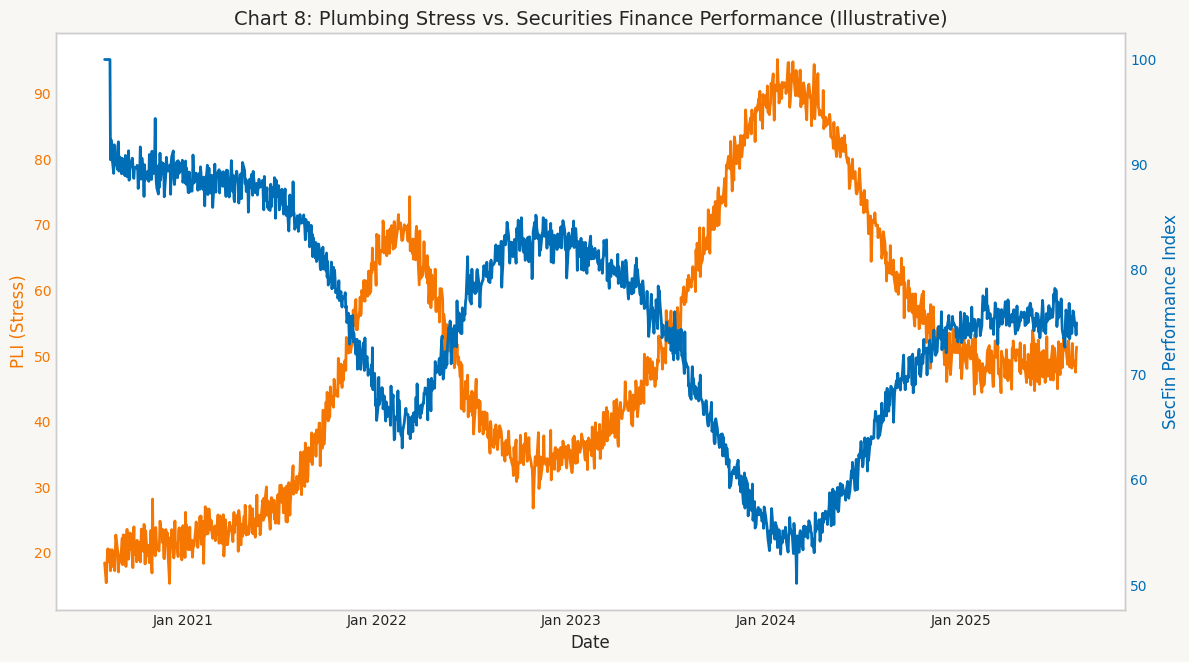

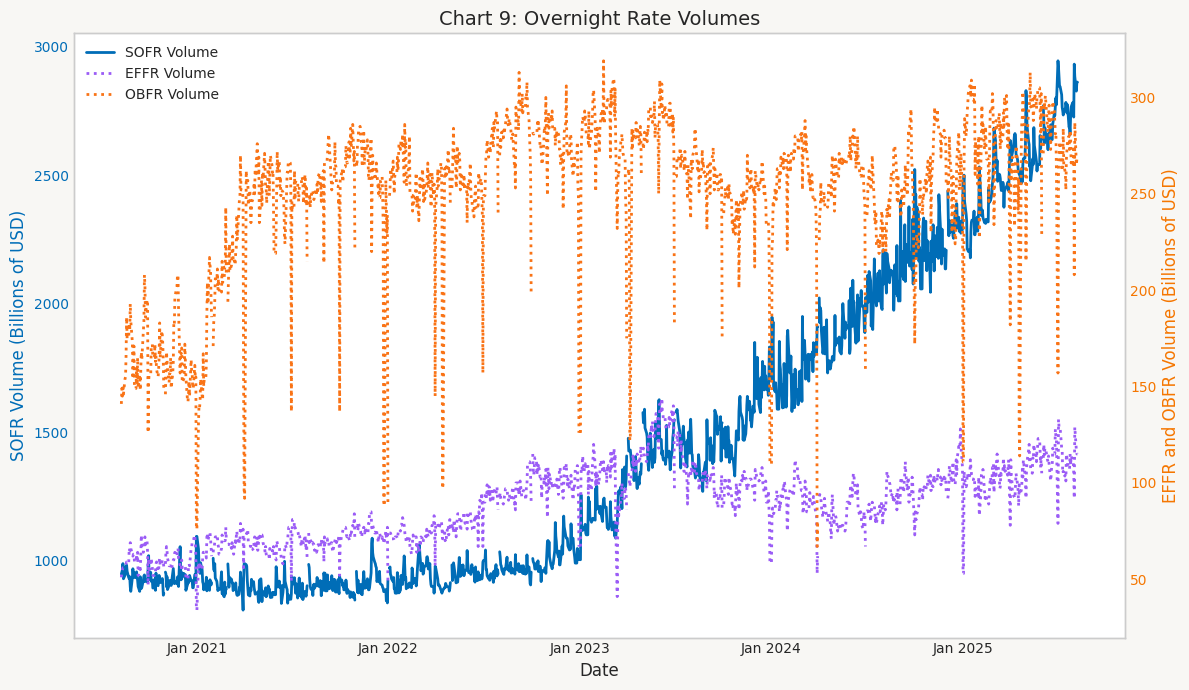

Charts generated and displayed.
Note: Combining charts into a single slide deck programmatically requires additional libraries and code not included in this basic plotting script.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from fredapi import Fred
from alpha_vantage.timeseries import TimeSeries
import os
import time
import zipfile

# Hardcode the API keys
FRED_API_KEY = '7f8e44038ee69c4f78cf71873e85db16'
ALPHA_VANTAGE_API_KEY = 'IOTZFZG01XK55BHI'
EXCEL_FILE_PATH_LIQUIDITY = "/content/rrp_tga_reserves.xlsx"
EXCEL_FILE_PATH_DEALER = "/content/BOGZ1FL663061105Q.xlsx"
BACKUP_ZIP_FILE = "/content/FRED_PLUMBING.zip"

# Initialize the Fred object with the API key
try:
    fred = Fred(api_key=FRED_API_KEY)
    print("FRED API initialized successfully.")
except Exception as e:
    print(f"Error initializing FRED API with hardcoded key: {e}")
    fred = None # Set fred to None if API key is not available

# Initialize Alpha Vantage API
try:
    if ALPHA_VANTAGE_API_KEY:
        # Corrected the typo in the variable name
        ts = TimeSeries(key=ALPHA_VANTAGE_API_KEY, output_format='pandas')
        print("Alpha Vantage API initialized successfully.")
    else:
        print("Warning: ALPHA_VANTAGE_API_KEY is not set. Alpha Vantage data will not be fetched.")
        ts = None
except Exception as e:
    print(f"Error initializing Alpha Vantage API with hardcoded key: {e}")
    ts = None


# --- Global Style Configuration ---
# Use a professional and clean style for all charts
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'DejaVu Sans'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 16
plt.rcParams['figure.facecolor'] = '#f8f7f4'
plt.rcParams['axes.facecolor'] = '#ffffff'
plt.rcParams['axes.grid'] = False # Remove grid lines

# Define custom colors
CUSTOM_BLUE = '#006db7'
CUSTOM_ORANGE = '#f57600'


# Corrected FRED Series IDs based on previous attempts and common usage
# Using new IDs provided by the user for Bank Reserves and Dealer Positions
fred_series_ids = {
    'OBFR': 'OBFR',
    'EFFR': 'DFF', # Corrected FRED ID for EFFR
    'SOFR': 'SOFR',
    'ON_RRP_Usage': 'RRPONTSYD',
    'Bank_Reserves': 'TOTRESNS',
    'TGA_Balance': 'WTREGEN',
    'Dealer_Net_Treasury_Positions': 'BOGZ1FL663061105Q',
    'EFFR_Volume': 'EFFRVOL',
    'SOFR_Volume': 'SOFRVOL',
    'OBFR_VOLUME': 'OBFRVOL',
    'SRF_Rate':'DFEDTARU',
    'ON_RRP_Rate':'RRPONTSYAWARD',
}

def fetch_fred_series(series_id, series_name, start_date=None, end_date=None):
    """Fetches a single FRED series and returns a pandas Series."""
    if fred is None:
        print(f"Skipping FRED series {series_name} ({series_id}): FRED API not initialized.")
        return pd.Series(dtype=float)
    try:
        print(f"Attempting to fetch FRED series: {series_name} ({series_id})...")
        data = fred.get_series(series_id, observation_start=start_date, observation_end=end_date)
        if data is None or data.empty:
            print(f"Warning: No data returned or empty for FRED series ID: {series_id} ({series_name}) from API. Will attempt backup.")
            return pd.Series(dtype=float)
        print(f"Successfully fetched data for {series_name} ({series_id}) from API. Data points: {len(data)}")
        return data
    except Exception as e:
        print(f"Error fetching FRED series {series_id} ({series_name}) from API: {e}. Will attempt backup.")
        return pd.Series(dtype=float)

def load_from_zip_backup(series_id, series_name, zip_file_path, start_date=None, end_date=None):
    """Loads data for a specific FRED series from a CSV within a zip backup."""
    csv_filename = f"{series_id}.csv"
    try:
        with zipfile.ZipFile(zip_file_path, 'r') as zf:
            if csv_filename in zf.namelist():
                print(f"Attempting to load data for {series_name} ({series_id}) from backup zip...")
                with zf.open(csv_filename) as f:
                    # Load data, assuming the CSV has a 'DATE' and 'VALUE' column
                    backup_df = pd.read_csv(f)
                    if 'DATE' in backup_df.columns and 'VALUE' in backup_df.columns:
                        backup_df['DATE'] = pd.to_datetime(backup_df['DATE'])
                        backup_df = backup_df.set_index('DATE')['VALUE']
                        if start_date is not None:
                            backup_df = backup_df.loc[backup_df.index >= start_date]
                        if end_date is not None:
                            backup_df = backup_df.loc[backup_df.index <= end_date]
                        print(f"Successfully loaded data for {series_name} ({series_id}) from backup. Data points: {len(backup_df)}")
                        return backup_df
                    else:
                        print(f"Error: CSV {csv_filename} in backup zip does not contain 'DATE' and 'VALUE' columns.")
                        return pd.Series(dtype=float)
            else:
                print(f"Warning: {csv_filename} not found in backup zip for {series_name} ({series_id}).")
                return pd.Series(dtype=float)
    except FileNotFoundError:
        print(f"Error: Backup zip file not found at {zip_file_path}.")
        return pd.Series(dtype=float)
    except Exception as e:
        print(f"Error loading data for {series_name} ({series_id}) from backup zip: {e}")
        return pd.Series(dtype=float)


def fetch_alpha_vantage_series(symbol, series_name, interval='daily', outputsize='full'):
    """Fetches a single Alpha Vantage series and returns a pandas DataFrame."""
    if ts is None:
        print(f"Skipping Alpha Vantage series {series_name} ({symbol}): Alpha Vantage API not initialized.")
        return pd.DataFrame()
    try:
        print(f"Attempting to fetch Alpha Vantage series: {series_name} ({symbol})...")
        # Using get_daily_adjusted for typical stock data, can change based on need
        data, meta_data = ts.get_daily_adjusted(symbol=symbol, outputsize=outputsize)
        if data is None or data.empty:
            print(f"Warning: No data returned or empty for Alpha Vantage symbol: {symbol} ({series_name}) from API.")
            return pd.DataFrame()
        print(f"Successfully fetched data for {series_name} ({symbol}) from API. Data points: {len(data)}")
        # Alpha Vantage returns data in a specific format, need to clean it up
        data.columns = [col.split('. ')[1] for col in data.columns] # Clean up column names
        data.index = pd.to_datetime(data.index) # Ensure index is datetime
        return data
    except Exception as e:
        print(f"Error fetching Alpha Vantage series {symbol} ({series_name}) from API: {e}")
        return pd.DataFrame()


# --- Data Generation Functions (Modified to use FRED and Excel and Alpha Vantage) ---

def generate_rate_data(years=5):
    """Fetches real data for overnight rates and volumes from FRED for a specified number of years, with backup."""
    end_date = pd.Timestamp.now()
    start_date = end_date - pd.DateOffset(years=years)

    rate_data = {}
    for series_name, series_id in {
        'OBFR': 'OBFR',
        'EFFR': 'DFF',
        'SOFR': 'SOFR',
        'EFFR_Volume': 'EFFRVOL',
        'SOFR_Volume': 'SOFRVOL',
        'OBFR_Volume': 'OBFRVOL',
        'SRF_Rate': 'DFEDTARU',
        'ON_RRP_Rate': 'RRPONTSYAWARD',
    }.items():
        data = fetch_fred_series(series_id, series_name, start_date, end_date)
        if data.empty and os.path.exists(BACKUP_ZIP_FILE):
             data = load_from_zip_backup(series_id, series_name, BACKUP_ZIP_FILE, start_date, end_date)
        if not data.empty:
            rate_data[series_name] = data

    df = pd.DataFrame(rate_data)

    if df.empty or not isinstance(df.index, pd.DatetimeIndex):
        print("Warning: No or invalid rate data fetched from FRED or backup. Returning empty DataFrame.")
        return pd.DataFrame(columns=['OBFR', 'EFFR', 'SOFR', 'EFFR_Volume', 'SOFR_Volume', 'OBFR_Volume', 'ON_RRP_Rate', 'SRF_Rate'])

    df = df.ffill().bfill()

    # Add policy rates (prioritize fetched data if available, otherwise use hardcoded)
    # Check if the fetched columns exist before using combine_first
    if 'ON_RRP_Rate' not in df.columns or df['ON_RRP_Rate'].dropna().empty:
         df['ON_RRP_Rate'] = pd.Series(5.25, index=df.index) # Use hardcoded if fetch failed
    if 'SRF_Rate' not in df.columns or df['SRF_Rate'].dropna().empty:
         df['SRF_Rate'] = pd.Series(5.50, index=df.index) # Use hardcoded if fetch failed


    # Ensure the DataFrame covers the specified years
    # Interpolate daily data to handle missing days before resampling
    df = df.resample('D').interpolate(method='time').asfreq('B').ffill()
    return df.loc[start_date:end_date].dropna(how='all')


def fetch_fred_liquidity_data(years=5):
    """Fetches liquidity data (Bank Reserves, TGA, ON RRP) from FRED."""
    end_date = pd.Timestamp.now().normalize()
    start_date = end_date - pd.DateOffset(years=years)

    liquidity_data = {}
    # Use the FRED IDs already defined
    series_ids_to_fetch = {
        'ON_RRP_Usage': 'RRPONTSYD',
        'Bank_Reserves': 'TOTRESNS',
        'TGA_Balance': 'WTREGEN',
    }

    for series_name, series_id in series_ids_to_fetch.items():
        data = fetch_fred_series(series_id, series_name, start_date, end_date)
        if data.empty and os.path.exists(BACKUP_ZIP_FILE):
             data = load_from_zip_backup(series_id, series_name, BACKUP_ZIP_FILE, start_date, end_date)
        if not data.empty:
            liquidity_data[series_name] = data

    df = pd.DataFrame(liquidity_data)

    if df.empty or not isinstance(df.index, pd.DatetimeIndex):
        print("Warning: No or invalid liquidity data fetched from FRED or backup. Returning empty DataFrame.")
        return pd.DataFrame(columns=['ON_RRP_Usage', 'Bank_Reserves', 'TGA_Balance'])

    # Convert units to Trillions (based on FRED descriptions - typically Billions)
    for col in ['ON_RRP_Usage', 'Bank_Reserves', 'TGA_Balance']:
        if col in df.columns and not df[col].dropna().empty:
            df[col] = df[col] / 1000.0 # Convert Billions to Trillions

    # Handle missing values (forward fill, then back fill)
    df = df.ffill().bfill()

    # Resample to monthly and take the last value of the month, then filter to last 'years'
    # FRED data for these series is typically weekly or daily, resampling to monthly for Chart 3/4
    df = df.resample('ME').last().dropna(how='all')
    return df.loc[start_date:end_date].dropna(how='all')


def fetch_fred_dealer_position_data(years=5):
    """Fetches dealer position data from FRED."""
    end_date = pd.Timestamp.now().normalize()
    start_date = end_date - pd.DateOffset(years=years)

    dealer_data = {}
    # Use the FRED ID already defined
    series_id_to_fetch = 'BOGZ1FL663061105Q'
    series_name = 'Net_Treasury_Positions'

    data = fetch_fred_series(series_id_to_fetch, series_name, start_date, end_date)
    if data.empty and os.path.exists(BACKUP_ZIP_FILE):
         data = load_from_zip_backup(series_id_to_fetch, series_name, BACKUP_ZIP_FILE, start_date, end_date)

    if not data.empty:
        dealer_data[series_name] = data

    df = pd.DataFrame(dealer_data)

    if df.empty or not isinstance(df.index, pd.DatetimeIndex):
        print("Warning: No or invalid dealer position data fetched from FRED or backup. Returning empty DataFrame.")
        return pd.DataFrame(columns=['Net_Treasury_Positions'])

    # Data from this FRED series is likely in Billions, no unit conversion needed for the plot

    # Handle missing values (forward fill, then back fill)
    df = df.ffill().bfill()

    # Resample to the appropriate frequency (likely quarterly based on FRED series) and filter to last 'years'
    # Assuming quarterly data frequency based on the original FRED series ID format
    df = df.resample('QS-JAN').last().dropna(how='all') # Resample to Quarterly Start (Jan) and take last value
    return df.loc[start_date:end_date].dropna(how='all')


def generate_synthesis_data(years=5):
    """Generates illustrative data for the synthesis chart (no FRED series) for a specified number of years."""
    end_date = pd.Timestamp.now().normalize()
    start_date = end_date - pd.DateOffset(years=years)
    dates = pd.to_datetime(pd.date_range(start=start_date, end=end_date, freq='B'))

    # Create a PLI that shows some stress events
    base_pli = 20 + np.linspace(0, 30, len(dates))
    stress_event1 = np.exp(-((np.arange(len(dates)) - len(dates)*0.3)**2) / (2 * (len(dates)*0.05)**2)) * 40
    stress_event2 = np.exp(-((np.arange(len(dates)) - len(dates)*0.7)**2) / (2 * (len(dates)*0.08)**2)) * 50
    pli = base_pli + stress_event1 + stress_event2 + np.random.normal(0, 2, size=len(dates))

    df = pd.DataFrame({'PLI': pli}, index=dates)

    # Create a SecFin index that reacts negatively to PLI with a lag
    df['SecFin_Performance'] = 100 - (df['PLI'].rolling(window=5).mean().shift(3) * 0.5) + np.random.normal(0, 1, size=len(dates))
    df['SecFin_Performance'] = df['SecFin_Performance'].fillna(100)

    return df

def generate_alpha_vantage_data(years=5):
    """Fetches relevant data from Alpha Vantage for a specified number of years."""
    # Define relevant Alpha Vantage symbols
    # Example: SPY (SPDR S&P 500 ETF Trust) as a proxy for market sentiment
    # You can add more symbols here based on what's helpful for your analysis
    alpha_vantage_symbols = {
        'SPY': 'SPDR S&P 500 ETF Trust',
        # Add more symbols here, e.g., for volatility (VIX if available via API or a proxy)
    }

    all_alpha_vantage_data = {}
    for symbol, name in alpha_vantage_symbols.items():
        # Introduce a small delay between API calls to avoid hitting rate limits
        time.sleep(1) # 1 second delay
        data = fetch_alpha_vantage_series(symbol, name, outputsize='full')
        if not data.empty:
            all_alpha_vantage_data[symbol] = data

    # Combine all fetched Alpha Vantage data into a single DataFrame
    # Check if all_alpha_vantage_data is empty before concatenating
    if not all_alpha_vantage_data:
        print("No Alpha Vantage data fetched or available.")
        return pd.DataFrame()

    combined_alpha_vantage_df = pd.concat(all_alpha_vantage_data.values(), axis=1, keys=all_alpha_vantage_data.keys())

    if combined_alpha_vantage_df.empty:
        print("Combined Alpha Vantage data is empty.")
        return pd.DataFrame()

    # Filter data to the last 'years'
    end_date = pd.Timestamp.now().normalize()
    start_date = end_date - pd.DateOffset(years=years)
    combined_alpha_vantage_df = combined_alpha_vantage_df.loc[start_date:end_date]

    # You may want to select specific columns from the Alpha Vantage data, e.g., 'close'
    # For example, to get only the closing price for SPY:
    if 'SPY' in combined_alpha_vantage_df.columns and 'close' in combined_alpha_vantage_df['SPY'].columns:
         combined_alpha_vantage_df['SPY_Close'] = combined_alpha_vantage_df[('SPY', 'close')]
         # Drop the multi-level columns if you've extracted what you need
         combined_alpha_vantage_df = combined_alpha_vantage_df[['SPY_Close']]


    # Handle missing values (forward fill, then back fill)
    combined_alpha_vantage_df = combined_alpha_vantage_df.ffill().bfill()


    return combined_alpha_vantage_df.dropna(how='all')


# --- Charting Functions ---

def plot_chart_1_rate_corridor(data, ax):
    """Plots Chart 1: Overnight Rates vs. The Fed's Corridor using combined data on a given axes."""

    # Primary Y-axis for Rates
    color1 = CUSTOM_BLUE # Using custom blue for rates
    ax.set_xlabel('Date')
    ax.set_ylabel('Rate (%)', color=color1)
    if 'OBFR' in data.columns and not data['OBFR'].dropna().empty:
         ax.plot(data.index, data['OBFR'], label='OBFR (Rate)', color='#f97316', lw=2) # Keeping original colors for now
    if 'EFFR' in data.columns and not data['EFFR'].dropna().empty:
         ax.plot(data.index, data['EFFR'], label='EFFR (Rate)', color='#22c55e', lw=2) # Keeping original colors for now
    if 'SOFR' in data.columns and not data['SOFR'].dropna().empty:
         ax.plot(data.index, data['SOFR'], label='SOFR (Rate)', color=CUSTOM_BLUE, lw=2) # Using custom blue

    # Add policy rates
    # Use data from the DataFrame if available, otherwise use default hardcoded values
    on_rrp_rate = data['ON_RRP_Rate'].dropna().iloc[-1] if 'ON_RRP_Rate' in data.columns and not data['ON_RRP_Rate'].dropna().empty else 5.25
    srf_rate = data['SRF_Rate'].dropna().iloc[-1] if 'SRF_Rate' in data.columns and not data['SRF_Rate'].dropna().empty else 5.50

    ax.axhline(srf_rate, color='#ef4444', ls='--', lw=2, label=f'SRF Rate ({srf_rate:.2f}%)')
    ax.axhline(on_rrp_rate, color='#0ea5e9', ls='--', lw=2, label=f'ON RRP Rate ({on_rrp_rate:.2f}%)')

    # Fill between policy rates
    # Ensure the fill area is aligned with the data index
    fill_data = data[['ON_RRP_Rate', 'SRF_Rate']].dropna(how='all')
    if not fill_data.empty:
        ax.fill_between(fill_data.index, fill_data['ON_RRP_Rate'], fill_data['SRF_Rate'], color='gray', alpha=0.1, label='Policy Corridor')
    elif not data.empty:
        # If no data for policy rates, fill between the hardcoded values across the plot's x-range using the data index
        ax.fill_between(data.index, on_rrp_rate, srf_rate, color='gray', alpha=0.1, label='Policy Corridor')


    ax.tick_params(axis='y', labelcolor=color1)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.grid(False) # Ensure no grid lines

    # No secondary axis for volume on this chart based on user feedback

    # Combine legends from both axes
    lines1, labels1 = ax.get_legend_handles_labels()
    ax.legend(lines1, labels1, loc='best')

    ax.set_title('Chart 1: Overnight Rates vs. The Fed\'s Policy Corridor')


def plot_chart_2_funding_spreads(data, ax):
    """Plots Chart 2: Key Funding Spreads using combined data (Volume removed) on a given axes."""

    # Primary Y-axis for Spreads
    color1 = CUSTOM_ORANGE
    ax.set_xlabel('Date')
    ax.set_ylabel('Spread (Basis Points)', color=color1)

    # Calculate spreads using columns from the combined data
    if 'OBFR' in data.columns and 'SOFR' in data.columns and not data[['OBFR', 'SOFR']].dropna().empty:
        obfr_sofr_spread = (data['OBFR'] - data['SOFR']) * 100
        ax.plot(data.index, obfr_sofr_spread, label='OBFR - SOFR Spread', color=CUSTOM_ORANGE, lw=2)

    # Using ON RRP Rate from the DataFrame for spread calculation
    if 'SOFR' in data.columns and 'ON_RRP_Rate' in data.columns and not data[['SOFR', 'ON_RRP_Rate']].dropna().empty:
         # Ensure both series are aligned by index before calculating the spread
         temp_spread_df = data[['SOFR', 'ON_RRP_Rate']].dropna()
         sofr_onrrp_spread = (temp_spread_df['SOFR'] - temp_spread_df['ON_RRP_Rate']) * 100
         # Use the latest ON RRP Rate for the label
         latest_on_rrp_rate = data['ON_RRP_Rate'].dropna().iloc[-1] if not data['ON_RRP_Rate'].dropna().empty else 5.25
         ax.plot(sofr_onrrp_spread.index, sofr_onrrp_spread, label=f'SOFR - ON RRP Rate ({latest_on_rrp_rate:.2f}%) Spread', color=CUSTOM_BLUE, lw=2)


    ax.axhline(0, color='black', lw=0.5, ls='--')
    ax.tick_params(axis='y', labelcolor=color1)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.grid(False) # Ensure no grid lines

    # Remove secondary Y-axis and volume plots
    # ax2 = ax.twinx()
    # color2 = '#14b8a6' # Using a different color for volume
    # ax2.set_ylabel('Volume (Billions of USD)', color=color2)

    # if 'EFFR_Volume' in data.columns and not data['EFFR_Volume'].dropna().empty:
    #     ax2.plot(data.index, data['EFFR_Volume'], label='EFFR Volume', color='#9b5cf6', ls=':', lw=2) # Using a different color/style for volume
    # if 'SOFR_Volume' in data.columns and not data['SOFR_Volume'].dropna().empty:
    #     ax2.plot(data.index, data['SOFR_Volume'], label='SOFR Volume', color='#3498db', ls=':', lw=2) # Using a different color/style for volume

    # ax2.tick_params(axis='y', labelcolor=color2)
    # ax2.grid(False) # Ensure no grid lines

    # Combine legends from both axes
    lines1, labels1 = ax.get_legend_handles_labels()
    # lines2, labels2 = ax2.get_legend_handles_labels() # Removed
    ax.legend(lines1, labels1, loc='best') # Updated legend call


    ax.set_title('Chart 2: Key Funding Spreads') # Updated title


def plot_chart_3_fed_liabilities(data, ax):
    """Plots Chart 3: Anatomy of the Fed's Key Liabilities using combined data on a given axes."""

    labels = []
    series_to_plot = []
    colors = []

    # Columns are expected to be converted to Trillions before being passed to the plotting function
    if 'Bank_Reserves' in data.columns and not data['Bank_Reserves'].dropna().empty:
        labels.append("Bank Reserves")
        series_to_plot.append(data['Bank_Reserves'])
        colors.append(CUSTOM_BLUE)
    if 'ON_RRP_Usage' in data.columns and not data['ON_RRP_Usage'].dropna().empty:
        labels.append("ON RRP Usage")
        series_to_plot.append(data['ON_RRP_Usage'])
        colors.append('#14b8a6')
    if 'TGA_Balance' in data.columns and not data['TGA_Balance'].dropna().empty:
        labels.append("TGA Balance")
        series_to_plot.append(data['TGA_Balance'])
        colors.append(CUSTOM_ORANGE)

    if series_to_plot:
        # Align indices before stacking - important if there are NaNs or different frequencies
        # Use outer join to ensure all dates are included
        combined_series_df = pd.concat(series_to_plot, axis=1)
        combined_series_df = combined_series_df.dropna(how='all') # Drop rows where all are NaN

        if not combined_series_df.empty:
             ax.stackplot(combined_series_df.index, *[combined_series_df[col] for col in combined_series_df.columns], labels=labels, colors=colors)
             ax.set_title('Chart 3: Anatomy of the Fed\'s Key Liabilities')
             ax.set_ylabel('Trillions of USD')
             ax.legend(loc='upper left')
             ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
             ax.grid(False)
        else:
            ax.text(0.5, 0.5, 'No data available for Chart 3', horizontalalignment='center', verticalalignment='center', fontsize=16, transform=ax.transAxes)
            ax.set_title('Chart 3: Anatomy of the Fed\'s Key Liabilities (No Data)')
            ax.axis('off')

    else:
        ax.text(0.5, 0.5, 'No data available for Chart 3', horizontalalignment='center', verticalalignment='center', fontsize=16, transform=ax.transAxes)
        ax.set_title('Chart 3: Anatomy of the Fed\'s Key Liabilities (No Data)')
        ax.axis('off')


def plot_chart_4_mmf_allocation(data, ax):
    """Plots Chart 4: MMF Cash Allocation (ON RRP Usage) using combined data on a given axes."""

    # Using the ON RRP Usage from the combined data, which is expected to be in Trillions from the FRED fetch,
    # but converting back to Billions for this specific chart's Y-axis label as requested previously.
    if 'ON_RRP_Usage' in data.columns and not data['ON_RRP_Usage'].dropna().empty:
        # Convert Trillions back to Billions for this specific chart's Y-axis label
        on_rrp_billions = data['ON_RRP_Usage'].dropna() * 1000

        ax.bar(on_rrp_billions.index, on_rrp_billions, width=20, color='#14b8a6', label='ON RRP Facility Usage')
        ax.set_title('Chart 4: MMF Cash Allocation (ON RRP Usage)')
        ax.set_ylabel('Billions of USD')
        ax.legend(loc='upper left')
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        ax.grid(False)
    else:
        ax.text(0.5, 0.5, 'No data available for Chart 4', horizontalalignment='center', verticalalignment='center', fontsize=16, transform=ax.transAxes)
        ax.set_title('Chart 4: MMF Cash Allocation (ON RRP Usage) (No Data)')
        ax.axis('off')


def plot_chart_5_dealer_inventory(data, ax):
    """Plots Chart 5: Primary Dealer Net Treasury Positions using combined data (Real from FRED) on a given axes."""

    # This chart now uses real data from the combined DataFrame fetched via FRED series BOGZ1FL663061105Q
    if 'Net_Treasury_Positions' in data.columns and not data['Net_Treasury_Positions'].dropna().empty:
        dealer_positions = data['Net_Treasury_Positions'].dropna()
        ax.plot(dealer_positions.index, dealer_positions, color='#8b5cf6', lw=2)
        ax.set_title('Chart 5: Primary Dealer Net Treasury Positions')
        # Data from FRED series BOGZ1FL663061105Q is in Billions
        ax.set_ylabel('Billions of USD')
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
        ax.grid(False)
    else:
        ax.text(0.5, 0.5, 'No data available for Chart 5', horizontalalignment='center', verticalalignment='center', fontsize=16, transform=ax.transAxes)
        ax.set_title('Chart 5: Primary Dealer Net Treasury Positions (No Data)')
        ax.axis('off')


def plot_chart_6_stir_futures(data, ax):
    """Plots Chart 6: Market Expectations for Future Policy (Illustrative) on a given axes."""

    # This chart will remain illustrative for now unless a suitable API is found
    maturities = ['+3M', '+6M', '+9M', '+12M', '+18M', '+24M']
    implied_rates = [5.25, 5.15, 5.0, 4.8, 4.5, 4.4]
    # Use the latest EFFR or SOFR as a proxy for current rate if available, otherwise use a hardcoded value
    current_rate = data['EFFR'].dropna().iloc[-1] if 'EFFR' in data.columns and not data['EFFR'].dropna().empty else (data['SOFR'].dropna().iloc[-1] if 'SOFR' in data.columns and not data['SOFR'].dropna().empty else 5.33)


    ax.plot(maturities, implied_rates, marker='o', ls='-', color='#eab308', lw=2, label='STIR Futures Implied Rate')
    ax.axhline(current_rate, color='gray', ls='--', lw=2, label=f'Current Policy Rate ({current_rate:.2f}%)')

    ax.set_title('Chart 6: Market Expectations for Future Policy (Illustrative)')
    ax.set_ylabel('Implied Rate (%)')
    ax.set_xlabel('Future Maturity')
    ax.legend()
    ax.grid(False)


def plot_chart_7_pli(data, ax):
    """Plots Chart 7: The Plumbing Liquidity Index (PLI) (Illustrative) using combined data on a given axes."""

    # This chart uses illustrative data from the combined DataFrame
    if 'PLI' in data.columns and not data['PLI'].dropna().empty:
        pli_data = data['PLI'].dropna()
        ax.plot(pli_data.index, pli_data, color=CUSTOM_ORANGE, lw=2, label='PLI')

        # Use the index of the actual data for fill_between
        ax.fill_between(pli_data.index, 0, 40, color='green', alpha=0.1, label='Calm')
        ax.fill_between(pli_data.index, 40, 70, color='yellow', alpha=0.1, label='Stressed')
        ax.fill_between(pli_data.index, 70, 100, color='red', alpha=0.1, label='Crisis')

        ax.set_title('Chart 7: The Plumbing Liquidity Index (PLI) (Illustrative)')
        ax.set_ylabel('Index Level (0-100)')
        ax.set_ylim(0, 100)
        ax.legend(loc='upper left')
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
        ax.grid(False)
    else:
        ax.text(0.5, 0.5, 'No data available for Chart 7', horizontalalignment='center', verticalalignment='center', fontsize=16, transform=ax.transAxes)
        ax.set_title('Chart 7: The Plumbing Liquidity Index (PLI) (Illustrative) (No Data)')
        ax.axis('off')


def plot_chart_8_synthesis(data, ax1):
    """Plots Chart 8: Plumbing Stress vs. Securities Finance Performance (Illustrative) using combined data on a given axes."""

    # This chart uses illustrative data from the combined DataFrame
    if 'PLI' in data.columns and 'SecFin_Performance' in data.columns and not data[['PLI', 'SecFin_Performance']].dropna().empty:

        # Align indices before plotting
        temp_df = data[['PLI', 'SecFin_Performance']].dropna()

        if not temp_df.empty:
            color1 = CUSTOM_ORANGE
            ax1.set_xlabel('Date')
            ax1.set_ylabel('PLI (Stress)', color=color1)
            ax1.plot(temp_df.index, temp_df['PLI'], color=color1, lw=2, label='PLI')
            ax1.tick_params(axis='y', labelcolor=color1)
            ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

            ax2 = ax1.twinx()
            color2 = CUSTOM_BLUE
            ax2.set_ylabel('SecFin Performance Index', color=color2)
            ax2.plot(temp_df.index, temp_df['SecFin_Performance'], color=color2, lw=2, label='SecFin Performance')
            ax2.tick_params(axis='y', labelcolor=color2)

            ax1.set_title('Chart 8: Plumbing Stress vs. Securities Finance Performance (Illustrative)')
            ax1.grid(False)
            ax2.grid(False)
        else:
            ax1.text(0.5, 0.5, 'No data available for Chart 8', horizontalalignment='center', verticalalignment='center', fontsize=16, transform=ax1.transAxes)
            ax1.set_title('Chart 8: Plumbing Stress vs. Securities Finance Performance (Illustrative) (No Data)')
            ax1.axis('off')
            # If twinx created a second axis, hide it too - check if ax2 exists and is different from ax1
            if 'ax2' in locals() and ax1 != ax2:
                 ax2.axis('off')

    else:
        ax1.text(0.5, 0.5, 'No data available for Chart 8', horizontalalignment='center', verticalalignment='center', fontsize=16, transform=ax1.transAxes)
        ax1.set_title('Chart 8: Plumbing Stress vs. Securities Finance Performance (Illustrative) (No Data)')
        ax1.axis('off')
        # If twinx created a second axis, hide it too - check if ax2 exists and is different from ax1
        if 'ax2' in locals() and ax1 != ax2:
             ax2.axis('off')


def plot_chart_9_volumes(data, ax1):
    """Plots Chart 9: Overnight Rate Volumes using combined data on a given axes."""

    # Primary Y-axis for SOFR Volume
    color1 = CUSTOM_BLUE
    ax1.set_xlabel('Date')
    ax1.set_ylabel('SOFR Volume (Billions of USD)', color=color1)
    if 'SOFR_Volume' in data.columns and not data['SOFR_Volume'].dropna().empty:
        ax1.plot(data.index, data['SOFR_Volume'], label='SOFR Volume', color=color1, lw=2)
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax1.grid(False) # Ensure no grid lines


    # Secondary Y-axis for EFFR and OBFR Volumes
    ax2 = ax1.twinx()
    color2 = CUSTOM_ORANGE
    ax2.set_ylabel('EFFR and OBFR Volume (Billions of USD)', color=color2)

    if 'EFFR_Volume' in data.columns and not data['EFFR_Volume'].dropna().empty:
        ax2.plot(data.index, data['EFFR_Volume'], label='EFFR Volume', color='#9b5cf6', ls=':', lw=2) # Using a different color/style for volume
    if 'OBFR_Volume' in data.columns and not data['OBFR_Volume'].dropna().empty:
        ax2.plot(data.index, data['OBFR_Volume'], label='OBFR Volume', color='#f97316', ls=':', lw=2) # Example color for OBFR Volume


    ax2.tick_params(axis='y', labelcolor=color2)
    ax2.grid(False) # Ensure no grid lines

    # Combine legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='best')


    ax1.set_title('Chart 9: Overnight Rate Volumes')


if __name__ == '__main__':
    # Generate necessary data
    rate_data = generate_rate_data(years=5)
    # Fetch liquidity data from FRED
    liquidity_data = fetch_fred_liquidity_data(years=5)
    # Fetch dealer data from FRED
    dealer_data = fetch_fred_dealer_position_data(years=5)
    synthesis_data = generate_synthesis_data(years=5) # Illustrative
    alpha_vantage_data = generate_alpha_vantage_data(years=5) # Fetch Alpha Vantage data


    # Print head and info of dataframes for inspection
    print("\n--- Inspection of rate_data DataFrame (for Charts 1, 2, 9) ---")
    display(rate_data.head())
    rate_data.info()

    print("\n--- Inspection of liquidity_data DataFrame (for Charts 3 and 4) ---")
    display(liquidity_data.head())
    liquidity_data.info()

    print("\n--- Inspection of dealer_data DataFrame (for Chart 5) ---")
    display(dealer_data.head())
    dealer_data.info()

    print("\n--- Inspection of alpha_vantage_data DataFrame ---")
    display(alpha_vantage_data.head())
    alpha_vantage_data.info()


    # Consolidate all data into a single DataFrame
    combined_df = rate_data.join(liquidity_data, how='outer').join(dealer_data, how='outer').join(synthesis_data, how='outer').join(alpha_vantage_data, how='outer')

    # Print info of combined_df to see all columns
    print("\n--- Inspection of combined_df DataFrame ---")
    combined_df.info()

    # Create figures and axes for each chart
    # This allows us to pass axes objects to the plotting functions
    fig1, ax1 = plt.subplots(figsize=(12, 7))
    fig2, ax2 = plt.subplots(figsize=(12, 7))
    fig3, ax3 = plt.subplots(figsize=(12, 7))
    fig4, ax4 = plt.subplots(figsize=(12, 7))
    fig5, ax5 = plt.subplots(figsize=(12, 7))
    fig6, ax6 = plt.subplots(figsize=(12, 7))
    fig7, ax7 = plt.subplots(figsize=(12, 7))
    fig8, ax8 = plt.subplots(figsize=(12, 7))
    fig9, ax9 = plt.subplots(figsize=(12, 7))


    # Plot all charts using the axes objects
    plot_chart_1_rate_corridor(combined_df, ax1)
    plot_chart_2_funding_spreads(combined_df, ax2)
    plot_chart_3_fed_liabilities(combined_df, ax3)
    plot_chart_4_mmf_allocation(combined_df, ax4)
    plot_chart_5_dealer_inventory(combined_df, ax5)
    plot_chart_6_stir_futures(combined_df, ax6)
    plot_chart_7_pli(combined_df, ax7)
    plot_chart_8_synthesis(combined_df, ax8)
    plot_chart_9_volumes(combined_df, ax9)

    # Apply tight layout to all figures
    fig1.tight_layout()
    fig2.tight_layout()
    fig3.tight_layout()
    fig4.tight_layout()
    fig5.tight_layout()
    fig6.tight_layout()
    fig7.tight_layout()
    fig8.tight_layout(rect=[0, 0, 1, 0.96]) # Adjust for suptitle
    fig9.tight_layout()


    # Instead of saving as HTML files, we can display them directly in the notebook
    # or explore options for combining them into a single presentation format.
    # For now, we'll keep displaying them individually.

    plt.show() # Display all plots

    # You can manually save each figure as a high-resolution image (e.g., PNG)
    # and then combine them into a presentation manually or using another tool.
    # Example:
    # fig1.savefig("chart1.png", dpi=300)
    # fig2.savefig("chart2.png", dpi=300)
    # ... and so on for all figures.

    # To create a slide deck programmatically, you would typically use libraries
    # like python-pptx. This is a more complex task and would require significant
    # code to arrange the plots on slides.

    print("Charts generated and displayed.")
    print("Note: Combining charts into a single slide deck programmatically requires additional libraries and code not included in this basic plotting script.")

In [ ]:
import pandas as pd
from fredapi import Fred

# --- 1. Setup ---
# What we're doing: Initializing the connection to the FRED API with your specific key.
# Why we're doing it: This is the required first step to authenticate and gain access to the FRED database.
api_key = '7f8e44038ee69c4f78cf71873e85db16'
fred = Fred(api_key=api_key)

# --- 2. Consolidate Series IDs ---
# What we're doing: Compiling a list of all unique FRED series identifiers from the previously discussed categories.
# Why we're doing it: This creates a master list for our data pull, and using a set ensures we don't request the same series twice.
gdp_series = ['GDP', 'GDPC1', 'A191RL1Q225SBEA', 'GDPPOT', 'GNP', 'PCEC', 'GPDI', 'GDI', 'NETEXP', 'GCE', 'PCDG', 'PCND', 'PCESV', 'FPI', 'NFCI', 'A939RX0Q048SBEA', 'PSAVERT', 'W068RCQ027SBEA', 'B009RC1Q027SBEA', 'B010RC1Q027SBEA', 'CP', 'Y001RE1Q156NBEA', 'INDPRO', 'TCU', 'OUTMS', 'GPDIC1', 'PCECC96', 'PNFIC1', 'PRFIC1', 'CBIC1', 'FGCEC1', 'SLCEC1', 'DPCERE1Q156NBEA', 'DSERE1Q156NBEA', 'DDURRE1Q156NBEA', 'DNDGRE1Q156NBEA', 'A191RP1A027NBEA', 'A008RE1Q156NBEA', 'A822RE1Q156NBEA', 'GFDEBTN', 'GFDEGDQ188S', 'A229RX0', 'PAGRNF', 'MANEMP', 'PCUOMFGOMFG', 'USARGDPC', 'M1V', 'M2V', 'A261RX1Q225SBEA']
labor_series = ['UNRATE', 'PAYEMS', 'ICSA', 'JTSJOL', 'U6RATE', 'NFPTH', 'LNS14000006', 'CES0500000003', 'CIVPART', 'EMRATIO', 'UNEMPLOY', 'CE16OV', 'CLF16OV', 'JTSHIL', 'JTSQUL', 'JTSLDR', 'CCSA', 'LNU03000000', 'TCU', 'HOANBS', 'PRS85006092', 'CES3000000008', 'CES0500000002', 'LNS11300000', 'LNS12300000', 'LNS13023622', 'LNS14027662', 'LNS12032183', 'ADPMNUS', 'USPRIV', 'USGOVT', 'DMANEMP', 'NDMANEMP', 'USCONS', 'USEPUINDXM', 'JTU51000000JOL', 'JTU23000000JOL', 'USSLIND', 'ECIWAG', 'ECICOMP', 'IURSA', 'UNEMPMN', 'UNEMPWOM', 'UEMPMED', 'JTS10000000TSR', 'LNS13000036', 'LNS13000060', 'LTUEMN', 'USLAH', 'JOLTS']
prices_series = ['CPIAUCSL', 'PCEPI', 'CPILFESL', 'PCEPILFE', 'PPIACO', 'FEDFUNDS', 'M2', 'T10Y2Y', 'T10YIE', 'GDPDEF', 'T5YIFR', 'MICH', 'CPIMEDSL', 'CPIENGSL', 'CUSR0000SETB01', 'PCUOMFGOMFG', 'WPSFD4131', 'OILPRICE', 'GASREGW', 'CPIFABSL', 'PCECTPI', 'CPITRNSL', 'CPIAPPSL', 'CPIMEDNS', 'CUSR0000SAH1', 'STICKYCPI', 'CORESTICKM159SFRBATL', 'PCEDG', 'PCEND', 'PCESV', 'EXPINF1YR', 'EXPINF5YR', 'T5YIE', 'WPU051', 'WPU02', 'IMPGS', 'EXPGS', 'CESIUSD', 'PPIFIS', 'PCEPI_PY', 'CPIAUCSL_PC1', 'CPIULFSL', 'CPITBASL', 'APU000072610', 'WPU101', 'PCETRIM1M158SFRBDAL', 'WPU06', 'PCPI', 'GDPPOT', 'MULT']
health_series = ['CPIMEDSL', 'A229RX0', 'W068RCQ027SBEA', 'CPIMEDNS', 'PCU446110446110', 'A763RX0Q048SBEA', 'B231RX1Q020SBEA', 'HCHS', 'LNS14000006', 'CPIMCSL', 'CPIMCSL_PC1', 'PCU621111621111', 'PCU622000622000', 'IPU62L200000000', 'USSTHPI', 'PCU621510621510', 'IPU6211T3S', 'A763RC1Q027SBEA', 'B231RC1A027NBEA', 'MEHOINUSA672N', 'CPIMCCL', 'PCU621610621610', 'EXPCTNS', 'USGHE', 'PCU623000622300', 'B230RC2A027NBEA', 'CPIMPRS', 'CPIMPHS', 'W073RC1Q027SBEA', 'PCU621410621410', 'CEXHEALTH', 'CPIMPSL', 'IPU6215S', 'USGHEPCAPD', 'B230RG3A027NBEA', 'PCU621210621210', 'PCU621310621310', 'PCU621320621320', 'PCU621330621330', 'PCU621340621340', 'PCU621900621900', 'PCU623110623110', 'PCU623311623311', 'PCU623990623990', 'PCU624100624100', 'PCU624200624200', 'PCU624310624310', 'PCU624410624410', 'USAGHE', 'USAPHE']
money_series = ['FEDFUNDS', 'M2', 'M1', 'DTB3', 'DGS10', 'DGS2', 'T10Y2Y', 'M2V', 'WALCL', 'BASE', 'WILL5000PR', 'DPRIME', 'MORTGAGE30US', 'BAMLH0A0HYM2', 'TOTALSL', 'REVOLSL', 'NONREVSL', 'DTWEXBGS', 'FF', 'SOFR', 'DFF', 'MBST', 'T10YIE', 'T5YIE', 'TEDRATE', 'BAMLHE00EHYIEY', 'TERMCB', 'LOANS', 'DRALACBS', 'DRCLACBS', 'TOTBKCR', 'DGS30', 'DGS5', 'DGS1', 'DGS3MO', 'DPSACBW027SBOG', 'WRBWFRBL', 'M1V', 'USSTHPI', 'DTWEXM', 'EXCSREPS', 'IORB', 'PSAVERT', 'CURRCIR', 'DEMDEPSL', 'SAVINGSL', 'TLAACBW027SBOG', 'MULT', 'WM2NS', 'MZM']
trade_series = ['BOPGSTB', 'NETEXP', 'IMPGS', 'EXPGS', 'DTWEXBGS', 'BOPBCA', 'BOPTRD', 'BOPG', 'XTIMVA01USM657S', 'XTEXVA01USM657S', 'IEAXGS', 'IEXGS', 'BOPEX', 'BOPIM', 'DTWEXM', 'PCU484000484000', 'WPU142', 'EXJPUS', 'EXCHUS', 'EXCAUS', 'EXMXUS', 'EXUSEU', 'EXUSUK', 'IMPCH', 'EXPCH', 'IMPCN', 'EXPCN', 'IMPMX', 'EXPMX', 'IMPJP', 'EXPJP', 'IMPGM', 'EXPGM', 'WPUID61', 'WPUID62', 'WPUFD4', 'XTEBAG01USM667S', 'IPM', 'BALBUSA', 'TTRVOL', 'WILL5000INDFC', 'IRSTCI01USM156N', 'TOTCI', 'GDP', 'USEPUINDXM', 'TWEXAFEGSMTH', 'TWEXEMEGSMTH', 'CHNOPEN', 'USAOPEN', 'WLDOPEN']
gov_series = ['GFDEBTN', 'GFDEGDQ188S', 'FGEXP', 'FGTRET', 'MTSDS133FMS', 'FYGFD', 'GCE', 'W068RCQ027SBEA', 'FGRECPT', 'A091RC1Q027SBEA', 'USGOVT', 'A822RE1Q156NBEA', 'W006RC1Q027SBEA', 'FDEBTTLM', 'FYGFGDQ188S', 'W019RC1Q027SBEA', 'GGFDFN', 'GGGD', 'GGR', 'GGEXP', 'SLREC', 'SLEXP', 'SLCSL', 'FDHB', 'FDHBPIN', 'FDHBCUR', 'GFD', 'HBFIGSL', 'W054RC1Q027SBEA', 'W073RC1Q027SBEA', 'SLGSDODNS', 'FYOINT', 'FYONET', 'FYFR', 'FYOEA', 'A763RC1A027NBEA', 'A764RC1A027NBEA', 'B087RC1A027NBEA', 'B088RC1A027NBEA', 'SLGTFP', 'SLGSI', 'SLCEC1', 'FGCEC1', 'GSP', 'W055RC1Q027SBEA', 'W790RC1Q027SBEA', 'W911RC1Q027SBEA', 'FYTDS', 'FGDEF', 'SLDEF']
consumer_series = ['PCEC', 'PCEDG', 'PSAVERT', 'UMCSENT', 'PCECC96', 'TOTALSL', 'REVOLSL', 'MEHOINUSA672N', 'DSPIC96', 'PCESV', 'PCND', 'DPCERA3M086SBEA', 'HOUST', 'CPIAUCSL', 'GASREGW', 'MORTGAGE30US', 'DPI', 'PI', 'RRSFS', 'WILL5000PR', 'UCNMVS', 'CCLACBW027SBOG', 'DRCCLACBS', 'W209RC1Q027SBEA', 'POP', 'W875RX1', 'A229RX0', 'HFINWPDJMV', 'TDSP', 'MDSP', 'CDSP', 'MVMRQS', 'MRTSSM44X72USS', 'RSXFS', 'AUTOSL', 'PCECTPI', 'B001RG3A086NBEA', 'B230RC2A027NBEA', 'CEXHEALTH', 'CEXTOTAL', 'PERMIT', 'CSUSHPINSA', 'NEWRECSL', 'EXHOSLUSM495S', 'UCCC', 'CONFNS', 'PSAVERT_B', 'W055RC1Q027SBEA', 'DSPI']
housing_series = ['HOUST', 'MORTGAGE30US', 'CSUSHPINSA', 'PERMIT', 'MSPUS', 'EXHOSLUSM495S', 'HOUST1F', 'USSTHPI', 'PRFIC1', 'RRVRUSQ156N', 'HVRUSQ156N', 'UNDCONTSA', 'DRSFRMACBS', 'ETOTALUSQ176N', 'COMPUTSA', 'PERMIT1F', 'NHSUSSPT', 'USHPI', 'POPS', 'MORTGAGE15US', 'MORTGAGE5US', 'HPIPONM226S', 'MSACSR', 'NHSUSPSA', 'CUSR0000SEHC', 'CUSR0000SEHA', 'PCU23', 'WPUSI012011', 'TLRESCONS', 'TLPRCON', 'TLPUCON', 'CONS', 'CES2023610001', 'UNDCON1FSA', 'COMP1FSA', 'ACTLISCOU_US', 'MEDLISPRI_US', 'MEDDAYONMAR_US', 'NEWLISCOU_US', 'PRICUTCOU_US', 'TOTFOR', 'ASPUS', 'EVACANTUSQ176N', 'MORTG', 'HOUSTMW', 'HOUSTNE', 'HOUSTS', 'HOUSTW', 'NABSHOME', 'FIXHAI']
taxes_series = ['FGTRET', 'W054RC1Q027SBEA', 'W006RC1Q027SBEA', 'FYFR', 'FYOINT', 'SLCSL', 'TPCI', 'TPI', 'TTR', 'SLPTI', 'SLCTR', 'SLTX', 'W782RC1Q027SBEA', 'W078RC1Q027SBEA', 'W207RC1Q027SBEA', 'A074RC1Q027SBEA', 'W971RC1Q027SBEA', 'CP', 'CPROFIT', 'A446RC1Q027SBEA', 'B979RC1A027NBEA', 'B235RC1A027NBEA', 'B236RC1A027NBEA', 'A053RC1A027NBEA', 'A054RC1A027NBEA', 'A055RC1A027NBEA', 'A056RC1A027NBEA', 'A057RC1A027NBEA', 'A058RC1A027NBEA', 'B075RC1A027NBEA', 'B244RC1A027NBEA', 'B245RC1A027NBEA', 'W025RC1Q027SBEA', 'W026RC1Q027SBEA', 'W784RC1Q027SBEA', 'FGITR', 'FGCTR', 'MTSD101FMS', 'MTSD102FMS', 'RECPROOTH', 'SLTC', 'RETAIL', 'INDPRO', 'GDP', 'CPIAUCSL', 'PSAVERT', 'A191RL1Q225SBEA', 'DSPIC96', 'DPI', 'PI']

# Combine all lists and get unique series IDs
all_series = set(
    gdp_series + labor_series + prices_series + health_series +
    money_series + trade_series + gov_series + consumer_series +
    housing_series + taxes_series
)

print(f"Total number of unique series to download: {len(all_series)}")


# --- 3. Data Retrieval ---
# What we're doing: Looping through each unique series ID and attempting to download its data from 2000-01-01.
# Why we're doing it: This is the core data-gathering step. The try-except block makes the script robust, preventing it from crashing if a single series is unavailable.
start_date = '2000-01-01'
all_data_dict = {}
failed_series = []

for series_id in all_series:
    try:
        data = fred.get_series(series_id, start_date)
        all_data_dict[series_id] = data
        print(f"Successfully downloaded: {series_id}")
    except Exception as e:
        print(f"--- FAILED to download: {series_id} | Reason: {e} ---")
        failed_series.append(series_id)

print("\n--- Download Summary ---")
print(f"Successfully downloaded {len(all_data_dict)} series.")
if failed_series:
    print(f"Failed to download {len(failed_series)} series: {failed_series}")
else:
    print("All series were downloaded successfully.")


# --- 4. Final DataFrame Creation ---
# What we're doing: Combining the dictionary of individual data series into a single pandas DataFrame.
# Why we're doing it: This creates a tidy, unified dataset which is the standard format for analysis in pandas.
if all_data_dict:
    macro_df = pd.concat(all_data_dict, axis=1)

    # Display the head and info of the final DataFrame
    print("\n--- Final DataFrame Head ---")
    print(macro_df.head())

    print("\n--- Final DataFrame Info ---")
    macro_df.info()
else:
    print("\nNo data was downloaded, so no DataFrame was created.")

In [ ]:
import pandas as pd
from fredapi import Fred
import time # Import the time library

# --- 1. Setup API Keys ---
api_key_primary = '7f8e44038ee69c4f78cf71873e85db16'
api_key_secondary = 'bdb4f5e5fc848858bd5578696d6b810e' # Your second key

fred_primary = Fred(api_key=api_key_primary)

# --- 2. Consolidate Series IDs (same as before) ---
all_series = {'PCU621320621320', 'FDEBTTLM', 'CPIMCSL', 'GGR', 'EXPCN', 'NEWRECSL', 'LNS12032183', 'B230RG3A027NBEA', 'A261RX1Q225SBEA', 'PCU624100624100', 'COMP1FSA', 'B230RC2A027NBEA', 'PCU23', 'USAGHE', 'WILL5000PR', 'HFINWPDJMV', 'B001RG3A086NBEA', 'TERMCB', 'MTSD102FMS', 'SLCTR', 'A764RC1A027NBEA', 'W019RC1Q027SBEA', 'ECICOMP', 'PCPI', 'B231RX1Q020SBEA', 'TLPRCON', 'FYTDS', 'FGTRET', 'SLPTI', 'PCU621330621330', 'NABSHOME', 'CEXHEALTH', 'ADPMNUS', 'PAGRNF', 'PCU621410621410', 'W911RC1Q027SBEA', 'CES0500000002', 'USGHE', 'IPU62L200000000', 'W207RC1Q027SBEA', 'UNEMPWOM', 'MEDLISPRI_US', 'SLTX', 'SLGSI', 'UNEMPMN', 'WILL5000INDFC', 'CPIULFSL', 'DEMDEPSL', 'EXHOSLUSM495S', 'IMPJP', 'STICKYCPI', 'HCHS', 'USPRIV', 'DSPIC96', 'DNDGRE1Q156NBEA', 'MBST', 'DPCERA3M086SBEA', 'WPUFD4', 'PCU484000484000', 'BOPIM', 'SLREC', 'BALBUSA', 'PSAVERT_B', 'A763RC1Q027SBEA', 'TOTFOR', 'CPIMPHS', 'FGCTR', 'IEXGS', 'PCU624310624310', 'SLEXP', 'SLGTFP', 'JTU51000000JOL', 'FGITR', 'NHSUSPSA', 'EXPGM', 'B075RC1A027NBEA', 'CPIMPRS', 'POPS', 'A058RC1A027NBEA', 'JOLTS', 'PERMIT1F', 'CONS', 'CHNOPEN', 'UNDCON1FSA', 'JTS10000000TSR', 'PCU622000622000', 'GGEXP', 'B979RC1A027NBEA', 'EXPCTNS', 'USHPI', 'PCU624410624410', 'W784RC1Q027SBEA', 'JTU23000000JOL', 'B245RC1A027NBEA', 'PCU623000622300', 'MTSD101FMS', 'IPM', 'PCU623311623311', 'RECPROOTH', 'TPI', 'PCU621340621340', 'CPIMCCL', 'SLGSDODNS', 'RSXFS', 'W068RCQ027SBEA', 'A229RX0', 'B236RC1A027NBEA', 'TEDRATE', 'TWEXAFEGSMTH', 'W026RC1Q027SBEA', 'CPIMCSL_PC1', 'MRTSSM44X72USS', 'BOPTRD', 'USARGDPC', 'EXCSREPS', 'A008RE1Q156NBEA', 'CPITRNSL', 'PCU621310621310', 'A055RC1A027NBEA', 'EXCAUS', 'CPITBASL', 'IPU6211T3S', 'PSAVERT', 'HOUSTW', 'FDHB', 'DTB3', 'EXPINF5YR', 'PCU624200624200', 'NONREVSL', 'TOTCI', 'DRSFRMACBS', 'IMPGM', 'A057RC1A027NBEA', 'NHSUSSPT', 'WPU06', 'B010RC1Q027SBEA', 'CONFNS', 'LNU03000000', 'CPIMEDNS', 'XTEXVA01USM657S', 'WPUID61', 'TDSP', 'FYOINT', 'UNDCONTSA', 'UCCC', 'CEXTOTAL', 'HPIPONM226S', 'ICSA', 'EXPMX', 'USGOVT', 'LTUEMN', 'A074RC1Q027SBEA', 'ACTLISCOU_US', 'USSTHPI', 'ETOTALUSQ176N', 'DRALACBS', 'MVMRQS', 'CE16OV', 'TLRESCONS', 'B088RC1A027NBEA', 'W078RC1Q027SBEA', 'PCUOMFGOMFG', 'HVRUSQ156N', 'HBFIGSL', 'DGS3MO', 'PCU621900621900', 'MEDDAYONMAR_US', 'UNRATE', 'IMPMX', 'A763RX0Q048SBEA', 'MDSP', 'NFCI', 'SAVINGSL', 'CUSR0000SAH1', 'PCU621610621610', 'NFPTH', 'TTR', 'CP', 'SOFR', 'NEWLISCOU_US', 'CDSP', 'B231RC1A027NBEA', 'CCLACBW027SBOG', 'W209RC1Q027SBEA', 'W006RC1Q027SBEA', 'RRSFS', 'GGFDFN', 'SLTC', 'W971RC1Q027SBEA', 'GDI', 'BAMLHE00EHYIEY', 'BASE', 'GGGD', 'GPDIC1', 'USEPUINDXM', 'CPIAUCSL', 'EXPJP', 'PRICUTCOU_US', 'XTEBAG01USM667S', 'GDPC1', 'DTWEXBGS', 'CPIMPSL', 'USGHEPCAPD', 'LNS13000060', 'FIXHAI', 'MORTGAGE30US', 'EXPGS', 'JTSJOL', 'PCECC96', 'FGEXP', 'XTIMVA01USM657S', 'LNS11300000', 'DPSACBW027SBOG', 'CPILFESL', 'USAOPEN', 'DPRIME', 'WPUSI012011', 'USAPHE', 'LNS12300000', 'IPU6215S', 'AUTOSL', 'PCU623990623990', 'IURSA', 'UCNMVS', 'HOUST1F', 'LNS13000036', 'PCEPI', 'FYOEA', 'TLPUCON', 'W073RC1Q027SBEA', 'MANEMP', 'NETEXP', 'PPIACO', 'RETAIL', 'LNS14027662', 'A191RP1A027NBEA', 'GFD', 'GFDEGDQ188S', 'FGRECPT', 'TPCI', 'PCETRIM1M158SFRBDAL', 'B244RC1A027NBEA', 'IMPCN', 'DSERE1Q156NBEA', 'BOPEX', 'CLF16OV', 'PCEPI_PY', 'FDHBCUR', 'SLCSL', 'BAMLH0A0HYM2', 'TTRVOL', 'BOPG', 'HOUSTS', 'CUSR0000SETB01', 'W055RC1Q027SBEA', 'GPDI', 'PCESV', 'CESIUSD', 'PCEDG', 'FYONET', 'GSP', 'IEAXGS', 'M2', 'WLDOPEN', 'A056RC1A027NBEA', 'OILPRICE', 'PAYEMS', 'BOPGSTB', 'CES2023610001', 'CPIAUCSL_PC1', 'PCU621510621510', 'CBIC1', 'PRS85006092', 'B087RC1A027NBEA', 'W790RC1Q027SBEA', 'EXPCH', 'M2V', 'PNFIC1', 'CPIFABSL', 'LOANS', 'CPIAPPSL', 'PPIFIS', 'HOANBS', 'TWEXEMEGSMTH', 'WPU142', 'A446RC1Q027SBEA', 'ASPUS', 'UMCSENT', 'USSLIND', 'PCEND', 'TOTBKCR', 'EVACANTUSQ176N', 'T10YIE', 'DPCERE1Q156NBEA', 'JTSLDR', 'MSPUS', 'CPIENGSL', 'SLCEC1', 'HOUSTMW', 'M1', 'GFDEBTN', 'EXMXUS', 'DMANEMP', 'IMPGS', 'A053RC1A027NBEA', 'W875RX1', 'HOUSTNE', 'DGS10', 'CCSA', 'ECIWAG', 'NDMANEMP', 'TOTALSL', 'W054RC1Q027SBEA', 'EXCHUS', 'W782RC1Q027SBEA', 'FGDEF', 'B009RC1Q027SBEA', 'CPROFIT', 'FYFR', 'CES0500000003', 'EXPINF1YR', 'M1V', 'W025RC1Q027SBEA', 'FF', 'FPI', 'DSPI', 'CURRCIR', 'TCU', 'FEDFUNDS', 'USLAH', 'POP', 'EXJPUS', 'DDURRE1Q156NBEA', 'MORTGAGE15US', 'MORTGAGE5US', 'GDPPOT', 'DGS30', 'T5YIE', 'PCEC', 'DGS1', 'JTSHIL', 'MSACSR', 'IMPCH', 'CSUSHPINSA', 'HOUST', 'A822RE1Q156NBEA', 'GDPDEF', 'CUSR0000SEHA', 'JTSQUL', 'CORESTICKM159SFRBDAL', 'MICH', 'WM2NS', 'PRFIC1', 'DPI', 'PCECTPI', 'DGS5', 'FDHBPIN', 'APU000072610', 'MORTG', 'T10Y2Y', 'WPUID62', 'GASREGW', 'U6RATE', 'PI', 'TLAACBW027SBOG', 'A191RL1Q225SBEA', 'UNEMPLOY', 'DGS2', 'A939RX0Q048SBEA', 'PERMIT', 'CIVPART', 'PCDG', 'GDP', 'PCU621210621210', 'DFF', 'CUSR0000SEHC', 'CES3000000008', 'PCND', 'MULT', 'DRCLACBS', 'FGCEC1', 'DTWEXM', 'WPU02', 'WPU051', 'SLDEF', 'REVOLSL', 'IORB', 'LNS14000006', 'USCONS', 'PCU623110623110', 'PCU446110446110', 'DRCCLACBS', 'MTSDS133FMS', 'MEHOINUSA672N', 'Y001RE1Q156NBEA', 'MZM', 'A763RC1A027NBEA', 'CPIMEDSL', 'RRVRUSQ156N', 'LNS13023622', 'WRBWFRBL', 'B235RC1A027NBEA', 'WPSFD4131', 'GCE', 'OUTMS', 'EXUSUK', 'GNP', 'IRSTCI01USM156N', 'FYGFGDQ188S', 'A054RC1A027NBEA', 'EXUSEU', 'BOPBCA', 'INDPRO', 'T5YIFR', 'FYGFD', 'WALCL', 'COMPUTSA', 'WPU101', 'EMRATIO', 'UEMPMED', 'PCEPILFE', 'PCU621111621111', 'A091RC1Q027SBEA'}

print(f"Total number of unique series to download: {len(all_series)}")

# --- 3. Data Retrieval with Primary Key ---
start_date = '2000-01-01'
all_data_dict = {}
failed_series = {'non_existent': [], 'rate_limited': []}

print("\n--- Starting download with PRIMARY key ---")
for series_id in all_series:
    try:
        data = fred_primary.get_series(series_id, start_date)
        all_data_dict[series_id] = data
        print(f"Successfully downloaded: {series_id}")
    except Exception as e:
        # Check the error message to see why it failed
        if 'Too Many Requests' in str(e):
            print(f"--- RATE LIMIT HIT for: {series_id} ---")
            failed_series['rate_limited'].append(series_id)
        else:
            print(f"--- FAILED (Non-existent?): {series_id} ---")
            failed_series['non_existent'].append(series_id)

    time.sleep(0.5) # PAUSE for 0.5 seconds to respect rate limit

# --- 4. Retry Rate-Limited Series with Secondary Key ---
if failed_series['rate_limited']:
    print("\n--- Retrying rate-limited series with SECONDARY key ---")
    fred_secondary = Fred(api_key=api_key_secondary)

    for series_id in failed_series['rate_limited']:
        try:
            data = fred_secondary.get_series(series_id, start_date)
            all_data_dict[series_id] = data
            print(f"Successfully downloaded on retry: {series_id}")
            # Remove from failed list if successful
            failed_series['rate_limited'].remove(series_id)
        except Exception as e:
            print(f"--- FAILED ON RETRY: {series_id} | Reason: {e} ---")

        time.sleep(0.5) # Also pause on the retry attempts

# --- 5. Final Summary and DataFrame Creation ---
print("\n--- Final Download Summary ---")
print(f"Successfully downloaded {len(all_data_dict)} series.")
if failed_series['non_existent']:
    print(f"Could not find {len(failed_series['non_existent'])} series (likely discontinued).")
if failed_series['rate_limited']:
    print(f"Still failed to download {len(failed_series['rate_limited'])} series after retry: {failed_series['rate_limited']}")

if all_data_dict:
    macro_df = pd.concat(all_data_dict, axis=1).sort_index()

    print("\n--- Final DataFrame Head ---")
    print(macro_df.head())

    print("\n--- Final DataFrame Info ---")
    macro_df.info()
else:
    print("\nNo data was downloaded, so no DataFrame was created.")

Total number of unique series to download: 423

--- Starting download with PRIMARY key ---
--- FAILED (Non-existent?): CPIMPRS ---
--- FAILED (Non-existent?): PCU621320621320 ---
--- FAILED (Non-existent?): POPS ---
--- FAILED (Non-existent?): A058RC1A027NBEA ---
Successfully downloaded: MULT
Successfully downloaded: DRCLACBS
Successfully downloaded: FGCEC1
--- FAILED (Non-existent?): JOLTS ---
Successfully downloaded: PRS85006092
Successfully downloaded: B087RC1A027NBEA
Successfully downloaded: W790RC1Q027SBEA
Successfully downloaded: EXPCH
Successfully downloaded: DTWEXM
Successfully downloaded: M2V
Successfully downloaded: PNFIC1
--- FAILED (Non-existent?): FDEBTTLM ---
Successfully downloaded: CPIFABSL
--- FAILED (Non-existent?): PERMIT1F ---
Successfully downloaded: WPU02
Successfully downloaded: WPU051
Successfully downloaded: LOANS
--- FAILED (Non-existent?): CONS ---
Successfully downloaded: SLDEF
Successfully downloaded: CPIAPPSL
Successfully downloaded: REVOLSL
Successfully d

In [ ]:
# Display the first few rows of the DataFrame
print("--- First 5 rows of the macro_df DataFrame ---")
display(macro_df.head())

# Display information about the DataFrame
print("\n--- Info of the macro_df DataFrame ---")
macro_df.info()

--- First 5 rows of the macro_df DataFrame ---


NameError: name 'macro_df' is not defined